In [2]:
import pandas as pd
import os
import datetime as dt
pd.set_option('display.max_columns',100)
import matplotlib.pyplot as plt
import seaborn as sns
# !pip install koreanize-matplotlib
import koreanize_matplotlib
import matplotlib as mpl
pd.set_option('display.max_colwidth', None)
import glob
import scipy.stats as stats

### enter_lesson_page

#### 기본 전처리 ()

In [3]:
enter_lesson_page = pd.read_csv('C:/Users/syc09/Desktop/코드잇/중급프로젝트1/Topic2_real/enter_lesson_page-001.csv')

C:\Users\syc09\AppData\Local\Temp\ipykernel_1280\2524196629.py:1: DtypeWarning: Columns (9,13,15) have mixed types. Specify dtype option on import or set low_memory=False.
  enter_lesson_page = pd.read_csv('C:/Users/syc09/Desktop/코드잇/중급프로젝트1/Topic2_real/enter_lesson_page-001.csv')


In [4]:
# 시간. UTC -> KST
enter_lesson_page['client_event_time'] = pd.to_datetime(enter_lesson_page['client_event_time'], errors='coerce')
enter_lesson_page['client_event_time'] = enter_lesson_page['client_event_time'] + pd.Timedelta(hours=9)

In [5]:
# 2022, 2023년 제한
enter_lesson_page = enter_lesson_page.loc[
    enter_lesson_page['client_event_time'].dt.year.between(2022, 2023)]

In [6]:
# 컬럼명 변경
enter_lesson_page.rename(columns={'content.id': 'content_id', 'lesson.id': 'lesson_id'}, inplace=True)
enter_lesson_page.rename(columns={'client_event_time': 'enter_lesson_time'}, inplace=True)

# 컬럼 버리기
enter_lesson_page.drop(columns=['platform', 'os_version', 'device_carrier'], inplace=True)
enter_lesson_page.drop(enter_lesson_page[enter_lesson_page['os_name'] == 'Chrome Headless'].index, inplace=True)

In [7]:
# 중복 컬럼 삭제
enter_lesson_page.duplicated(subset=['enter_lesson_time', 'user_id', 'content_id', 'lesson_id'], keep=False)

0           False
1           False
2           False
3           False
4           False
            ...  
21029702    False
21029703    False
21029704    False
21029705    False
21029706    False
Length: 21028196, dtype: bool

In [8]:
enter_lesson_page.head()

,city,enter_lesson_time,country,device_family,device_type,event_type,language,os_name,user_id,content_id,is_trial,lesson_id,is_free_trial
0,Wonju,2023-04-06 06:46:04.333,South Korea,Windows,Windows,enter.lesson_page,Korean,Chrome,91053eda0bffb4db6c9317acf15bc44a,94bdcbd9f329aafa84ab464b6721187d,False,d360d68b65fd3e0eafb7982386d75fd9,NaN
1,Wonju,2023-04-06 06:55:50.787,South Korea,Windows,Windows,enter.lesson_page,Korean,Chrome,91053eda0bffb4db6c9317acf15bc44a,94bdcbd9f329aafa84ab464b6721187d,False,d360d68b65fd3e0eafb7982386d75fd9,NaN
2,Wonju,2023-04-06 06:55:55.684,South Korea,Windows,Windows,enter.lesson_page,Korean,Chrome,91053eda0bffb4db6c9317acf15bc44a,94bdcbd9f329aafa84ab464b6721187d,False,770740696ab1809d6b50d4013b64a75c,NaN
3,Dongdaemun-gu,2023-04-06 06:04:55.828,South Korea,Mac,Mac,enter.lesson_page,Korean,Chrome,b2b31f00b82edc6419b25324a7ae41a4,5fc64d786416b980cfda86afd69e4516,False,68cc362ca81b5899b3c9b4dea0aaddff,NaN
4,Dongdaemun-gu,2023-04-06 06:05:34.139,South Korea,Mac,Mac,enter.lesson_page,Korean,Chrome,b2b31f00b82edc6419b25324a7ae41a4,db43a841c994231e2795d4df8931af50,False,144682f4648f81de8e6aabd11b92105e,NaN


### complete_lesson

#### 기본 전처리

In [9]:
complete_lesson = pd.read_csv('C:/Users/syc09/Desktop/코드잇/중급프로젝트1/Topic2_real/complete_lesson.csv')

In [10]:
# 시간. UTC -> KST
complete_lesson['client_event_time'] = pd.to_datetime(complete_lesson['client_event_time'], errors='coerce')
complete_lesson['client_event_time'] = complete_lesson['client_event_time'] + pd.Timedelta(hours=9)

In [11]:
# 2022, 2023년 제한
# complete_lesson = complete_lesson[(complete_lesson['client_event_time'] >= start_date) & (complete_lesson['client_event_time'] <= end_date)]
# 시간 필터링
complete_lesson = complete_lesson.loc[
    complete_lesson['client_event_time'].dt.year.between(2022, 2023)]

In [12]:
# 컬럼명 변경
complete_lesson.rename(columns={'content.id': 'content_id', 'lesson.id': 'lesson_id'}, inplace=True)
complete_lesson.rename(columns={'client_event_time': 'complete_lesson_time'}, inplace=True)

# 컬럼 버리기
complete_lesson.drop(columns=['platform', 'os_version', 'device_carrier'], inplace=True)
complete_lesson.drop(complete_lesson[complete_lesson['os_name'] == 'Chrome Headless'].index, inplace=True)

In [13]:
# 중복 컬럼 삭제
complete_lesson.duplicated(subset=['complete_lesson_time', 'user_id', 'content_id', 'lesson_id'], keep=False)

0          False
1          False
2          False
3          False
4          False
           ...  
5405064    False
5405065    False
5405066    False
5405067    False
5405068    False
Length: 5404242, dtype: bool

In [14]:
complete_lesson.head()

,city,complete_lesson_time,country,device_family,device_type,event_type,language,os_name,user_id,content_id,lesson_id
0,Wonju,2023-04-06 06:55:51.836,South Korea,Windows,Windows,complete.lesson,Korean,Chrome,91053eda0bffb4db6c9317acf15bc44a,94bdcbd9f329aafa84ab464b6721187d,d360d68b65fd3e0eafb7982386d75fd9
1,Daejeon,2023-04-06 06:19:01.243,South Korea,Windows,Windows,complete.lesson,Korean,Edge,41362ad5ebcade2bb1b78344a53e7ccf,445fac33232adcb3d1cdab7d8a579430,7e0f6aae886368ef9fa97007a8e9f7ac
2,Daejeon,2023-04-06 06:20:27.939,South Korea,Windows,Windows,complete.lesson,Korean,Edge,41362ad5ebcade2bb1b78344a53e7ccf,445fac33232adcb3d1cdab7d8a579430,d1e93c9dc08267efab31849bc6083854
3,Daejeon,2023-04-06 06:23:01.534,South Korea,Windows,Windows,complete.lesson,Korean,Edge,41362ad5ebcade2bb1b78344a53e7ccf,445fac33232adcb3d1cdab7d8a579430,f22ea5dc431035305e705552bbc4f45b
4,Daejeon,2023-04-06 06:28:34.965,South Korea,Windows,Windows,complete.lesson,Korean,Edge,41362ad5ebcade2bb1b78344a53e7ccf,445fac33232adcb3d1cdab7d8a579430,ce0bfeb7fb1259c588f437d48ab2690c


In [15]:
print(complete_lesson['complete_lesson_time'].min())
print(complete_lesson['complete_lesson_time'].max())

2022-01-01 09:00:01.181000
2023-12-31 23:59:51.635000


### 각 데이터에서 30초 이내 로그가 찍힌 것들, 동일한 년, 월, 일, 시, 분 삭제(같은 레슨일 경우)

- enter lesson

In [16]:
# enter_lesson_time을 시간 순서대로 정렬
enter_lesson_page_filtered = enter_lesson_page.sort_values(by=['user_id', 'enter_lesson_time'])

# 동일한 user_id에 대해 연속된 행의 시간 차이 계산
enter_lesson_page_filtered['time_diff'] = enter_lesson_page_filtered.groupby('user_id')['enter_lesson_time'].diff()

# 시간 차이를 초 단위로 변환
enter_lesson_page_filtered['time_diff_seconds'] = enter_lesson_page_filtered['time_diff'].dt.total_seconds() #.round(2)

In [17]:
# time_diff_seconds가 30초 초과인 데이터만 남김김
enter_lesson_page_finalised = enter_lesson_page_filtered[(enter_lesson_page_filtered['time_diff_seconds'] > 30)]

In [18]:
# 년-월-일-시-분 단위 컬럼 추가
enter_lesson_page_finalised["time_group"] = enter_lesson_page_finalised["enter_lesson_time"].dt.strftime("%Y-%m-%d %H:%M")

# 정렬 수행
enter_lesson_page_finalised = enter_lesson_page_finalised.sort_values(by=["user_id", "content_id", "lesson_id", "enter_lesson_time"])

# 중복 제거 (첫 번째 값 유지)
enter_lesson_page_finalised_unique = enter_lesson_page_finalised.drop_duplicates(subset=["user_id", "content_id", "lesson_id", "time_group"], keep="first")

enter_lesson_page_finalised_unique = enter_lesson_page_finalised_unique.drop_duplicates(
    subset=["user_id", "time_group"], keep="first"
)


# 필요 없는 컬럼 제거
enter_lesson_page_finalised_unique = enter_lesson_page_finalised_unique.drop(columns=["time_group"])


C:\Users\syc09\AppData\Local\Temp\ipykernel_1280\4201793937.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  enter_lesson_page_finalised["time_group"] = enter_lesson_page_finalised["enter_lesson_time"].dt.strftime("%Y-%m-%d %H:%M")


In [19]:
print(len(enter_lesson_page)) # 로우 데이터
print(len(enter_lesson_page_finalised)) # timediff 30초 초과 데이터
print(len(enter_lesson_page_finalised_unique)) # 동일한 년월일시분 삭제

21028196
8118190
7852494


In [20]:
print(enter_lesson_page['user_id'].nunique()) # 로우 데이터
print(enter_lesson_page_finalised['user_id'].nunique()) # timediff 30초 초과 데이터
print(enter_lesson_page_finalised_unique['user_id'].nunique()) # 동일한 년월일시분 삭제

113916
79820
79820


In [21]:
print(enter_lesson_page['lesson_id'].nunique()) # 로우 데이터
print(enter_lesson_page_finalised['lesson_id'].nunique()) # timediff 30초 초과 데이터
print(enter_lesson_page_finalised_unique['lesson_id'].nunique()) # 동일한 년월일시분 삭제

5479
5391
5383


In [22]:
enter_lesson_page_finalised_unique.describe()

,enter_lesson_time,time_diff,time_diff_seconds
count,7852494,7852494,7.852494e+06
mean,2023-01-07 20:17:21.373091584,0 days 15:31:14.171259363,5.587417e+04
min,2022-01-01 00:56:27.589000,0 days 00:00:30.001000,3.000100e+01
25%,2022-07-24 19:21:33.735750144,0 days 00:01:25.004250,8.500425e+01
50%,2023-01-26 11:07:25.428499968,0 days 00:03:20.362000,2.003620e+02
75%,2023-06-30 00:36:46.983249920,0 days 00:09:22.805000,5.628050e+02
max,2023-12-31 23:59:45.192000,722 days 23:20:52.788000,6.246485e+07
std,NaN,9 days 22:08:57.636050669,8.573376e+05


#### complete lesson

In [23]:
# enter_lesson_time을 시간 순서대로 정렬
complete_lesson_filtered = complete_lesson.sort_values(by=['user_id', 'complete_lesson_time'])

# 동일한 user_id에 대해 연속된 행의 시간 차이 계산
complete_lesson_filtered['time_diff'] = complete_lesson_filtered.groupby('user_id')['complete_lesson_time'].diff()

# 시간 차이를 초 단위로 변환
complete_lesson_filtered['time_diff_seconds'] = complete_lesson_filtered['time_diff'].dt.total_seconds() #.round(2)

In [24]:
# time_diff_seconds가 30초 초과인 데이터만 남김김
complete_lesson_finalised = complete_lesson_filtered[(complete_lesson_filtered['time_diff_seconds'] > 30)]

In [25]:
# 년-월-일-시-분 단위 컬럼 추가
complete_lesson_finalised["time_group"] = complete_lesson_finalised["complete_lesson_time"].dt.strftime("%Y-%m-%d %H:%M")

# 정렬 수행
complete_lesson_finalised = complete_lesson_finalised.sort_values(by=["user_id", "content_id", "lesson_id", "complete_lesson_time"])

# 중복 제거 (첫 번째 값 유지)
complete_lesson_finalised_unique = complete_lesson_finalised.drop_duplicates(subset=["user_id", "content_id", "lesson_id", "time_group"], keep="first")

complete_lesson_finalised_unique = complete_lesson_finalised_unique.drop_duplicates(
    subset=["user_id", "time_group"], keep="first"
)

# 필요 없는 컬럼 제거
complete_lesson_finalised_unique = complete_lesson_finalised_unique.drop(columns=["time_group"])


C:\Users\syc09\AppData\Local\Temp\ipykernel_1280\3935886420.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  complete_lesson_finalised["time_group"] = complete_lesson_finalised["complete_lesson_time"].dt.strftime("%Y-%m-%d %H:%M")


In [26]:
complete_lesson_finalised_unique.head()

,city,complete_lesson_time,country,device_family,device_type,event_type,language,os_name,user_id,content_id,lesson_id,time_diff,time_diff_seconds
222221,Seoul,2023-03-19 01:29:04.507,South Korea,Mac,Mac,complete.lesson,Korean,Safari,0000572f2ba8079bcefd2760b632e820,61b6463287573f00de13a930805a52d6,1e2a48ce24bce72e7d36da219ee9d254,0 days 00:05:53.192000,353.192
222220,Seoul,2023-03-19 01:23:11.315,South Korea,Mac,Mac,complete.lesson,Korean,Safari,0000572f2ba8079bcefd2760b632e820,61b6463287573f00de13a930805a52d6,3ae4d4504b620370687e58e0a33cf22d,0 days 00:04:43.050000,283.050
1199632,Seoul,2023-03-19 00:53:48.730,South Korea,Mac,Mac,complete.lesson,Korean,Safari,0000572f2ba8079bcefd2760b632e820,61b6463287573f00de13a930805a52d6,4d65e0729706704bf34953f2613d6ecd,0 days 00:02:14.017000,134.017
222225,Seoul,2023-03-19 01:48:55.626,South Korea,Mac,Mac,complete.lesson,Korean,Safari,0000572f2ba8079bcefd2760b632e820,61b6463287573f00de13a930805a52d6,58a55a039ef52567cfe0821f92b3c9e6,0 days 00:06:13.406000,373.406
222224,Seoul,2023-03-19 01:42:42.220,South Korea,Mac,Mac,complete.lesson,Korean,Safari,0000572f2ba8079bcefd2760b632e820,61b6463287573f00de13a930805a52d6,adfe4e8b1dc5d9f2e4b76e4bc8ee221c,0 days 00:04:11.322000,251.322


In [27]:
print(len(complete_lesson)) # 로우 데이터
print(len(complete_lesson_finalised)) # timediff 30초 초과 데이터
print(len(complete_lesson_finalised_unique)) # 동일한 년월일시분 삭제

5404242
4502312
4427700


In [28]:
print(complete_lesson['user_id'].nunique()) # 로우 데이터
print(complete_lesson_finalised['user_id'].nunique()) # timediff 30초 초과 데이터
print(complete_lesson_finalised_unique['user_id'].nunique()) # 동일한 년월일시분 삭제

49670
44419
44419


In [29]:
print(complete_lesson['lesson_id'].nunique()) # 로우 데이터
print(complete_lesson_finalised['lesson_id'].nunique()) # timediff 30초 초과 데이터
print(complete_lesson_finalised_unique['lesson_id'].nunique()) # 동일한 년월일시분 삭제

5050
5036
5034


In [30]:
complete_lesson_finalised_unique.describe()

,complete_lesson_time,time_diff,time_diff_seconds
count,4427700,4427700,4.427700e+06
mean,2023-01-21 05:03:18.948490752,0 days 15:37:22.346357195,5.624235e+04
min,2022-01-01 09:06:56.209000,0 days 00:00:30.001000,3.000100e+01
25%,2022-07-25 15:36:46.370500096,0 days 00:02:23.719000,1.437190e+02
50%,2023-01-28 16:36:47.536499968,0 days 00:04:56.299000,2.962990e+02
75%,2023-07-31 16:20:14.356499968,0 days 00:14:59.997250,8.999973e+02
max,2023-12-31 23:59:51.635000,720 days 13:46:13.325000,6.225757e+07
std,NaN,8 days 11:20:42.775909348,7.320428e+05


In [31]:
complete_lesson_finalised.describe()

,complete_lesson_time,time_diff,time_diff_seconds
count,4502312,4502312,4.502312e+06
mean,2023-01-21 03:30:51.147414016,0 days 15:28:03.565471665,5.568357e+04
min,2022-01-01 09:06:56.209000,0 days 00:00:30.001000,3.000100e+01
25%,2022-07-25 15:50:16.603500032,0 days 00:02:20.210000,1.402100e+02
50%,2023-01-28 13:08:16.047500032,0 days 00:04:51.706500,2.917065e+02
75%,2023-07-31 15:27:12.669250048,0 days 00:14:41.486500,8.814865e+02
max,2023-12-31 23:59:51.635000,720 days 13:46:13.325000,6.225757e+07
std,NaN,8 days 10:21:22.877575034,7.284829e+05


### complete_subscription에서 user_id를 가져오기

In [32]:
# complete_subscription['complete_subscription_time'].max()

In [33]:
# complete_subscription.isna().sum()

In [34]:
# 파일 불러오기 및 전처리리
complete_subscription = pd.read_csv('C:/Users/syc09/Desktop/코드잇/중급프로젝트1/Topic2_real/complete_subscription.csv')
complete_subscription['client_event_time'] = pd.to_datetime(complete_subscription['client_event_time'], errors='coerce')
complete_subscription['client_event_time'] = complete_subscription['client_event_time'] + pd.Timedelta(hours=9)
complete_subscription.drop(complete_subscription[complete_subscription['os_name'] == 'Chrome Headless'].index, inplace=True)


# 2022, 2023년 제한
# 시간 필터링
complete_subscription = complete_subscription.loc[
    complete_subscription['client_event_time'].dt.year.between(2022, 2023)]

In [35]:
complete_subscription = complete_subscription.drop_duplicates(subset=['user_id'], keep='first')
complete_subscription['user_id'].nunique()

13875

In [36]:
complete_subscription['client_event_time'].max()

Timestamp('2023-12-31 23:59:39.461000')

In [37]:
complete_subscription.isna().sum()

city                        522
client_event_time             0
country                     376
device_carrier            13875
device_family               368
device_type                 517
event_type                    0
language                    368
os_name                     374
os_version                  383
platform                    368
user_id                       0
plan.price                    0
paid_amount                   0
coupon.discount_amount        0
pg.type                   12274
dtype: int64

In [38]:
complete_subscription['user_id'].dropna().unique()

array(['1116a2ae90ca6b06f85feba27ad51ef0',
       'c0f5678df8967163e6e2c464ed006791',
       '79421b5d038205ad7adbb1e2c3b89741', ...,
       'abebe3234041d14b5c0c5821bf90ab26',
       '3ca22b0bade6b40d6274bf6d06bc4344',
       'c49ea18247c81a613f8bbf44ff029cb4'], dtype=object)

In [39]:
# 중복되는 user_id 제거
complete_subscription = complete_subscription.drop_duplicates(subset=['user_id'], keep='first')
complete_subscription['user_id'].nunique()

13875

In [40]:
# complete_subscription 파일에서 user_id 컬럼만 추출하여 저장
subscription_user_id_list = complete_subscription['user_id'].unique()

In [41]:
# subscription_user_id_list의 데이터 타입 확인
subscription_user_id_list.dtype

dtype('O')

In [42]:
subscription_user_id_list

array(['1116a2ae90ca6b06f85feba27ad51ef0',
       'c0f5678df8967163e6e2c464ed006791',
       '79421b5d038205ad7adbb1e2c3b89741', ...,
       'abebe3234041d14b5c0c5821bf90ab26',
       '3ca22b0bade6b40d6274bf6d06bc4344',
       'c49ea18247c81a613f8bbf44ff029cb4'], dtype=object)

#### enter_lesson, complete_lesson에 subscription_user_id_list의 user_id 필터링

- enter_lesson

In [43]:
# enter_lesson_page_finalised_unique 파일에서 subscription_user_id_list에 있는 user_id만 추출하여 저장
enter_lesson_page_finalised_unique_sub = enter_lesson_page_finalised_unique[enter_lesson_page_finalised_unique['user_id'].isin(subscription_user_id_list)]
enter_lesson_page_finalised_unique_sub.head()

,city,enter_lesson_time,country,device_family,device_type,event_type,language,os_name,user_id,content_id,is_trial,lesson_id,is_free_trial,time_diff,time_diff_seconds
16138,Seoul,2023-03-18 19:42:48.654,South Korea,Mac,Mac,enter.lesson_page,Korean,Safari,0000572f2ba8079bcefd2760b632e820,61b6463287573f00de13a930805a52d6,True,09c8a2d29087cb3d47823acb5f2705e3,NaN,0 days 00:05:42.876000,342.876
6147610,Seoul,2023-03-19 00:46:47.244,South Korea,Mac,Mac,enter.lesson_page,Korean,Safari,0000572f2ba8079bcefd2760b632e820,61b6463287573f00de13a930805a52d6,False,0cf175a1781a8e0020bf6c6bdc80e78a,NaN,0 days 00:01:11.785000,71.785
6147611,Seoul,2023-03-19 00:51:34.741,South Korea,Mac,Mac,enter.lesson_page,Korean,Safari,0000572f2ba8079bcefd2760b632e820,61b6463287573f00de13a930805a52d6,False,0cf175a1781a8e0020bf6c6bdc80e78a,NaN,0 days 00:04:47.497000,287.497
1140249,Seoul,2023-03-19 01:29:04.118,South Korea,Mac,Mac,enter.lesson_page,Korean,Safari,0000572f2ba8079bcefd2760b632e820,61b6463287573f00de13a930805a52d6,False,1e2a48ce24bce72e7d36da219ee9d254,NaN,0 days 00:05:50.893000,350.893
6147608,Seoul,2023-03-19 00:45:24.704,South Korea,Mac,Mac,enter.lesson_page,Korean,Safari,0000572f2ba8079bcefd2760b632e820,61b6463287573f00de13a930805a52d6,False,2ed4b83e65edc2b1efb193aaa3c60cf9,NaN,0 days 01:12:02.068000,4322.068


In [44]:
print(len(enter_lesson_page_finalised_unique_sub))
print(enter_lesson_page_finalised_unique_sub['user_id'].nunique())

3389303
12860


In [45]:
# complete_lesson_finalised_unique 파일에서 subscription_user_id_list에 있는 user_id만 추출하여 저장
complete_lesson_finalised_unique_sub = complete_lesson_finalised_unique[complete_lesson_finalised_unique['user_id'].isin(subscription_user_id_list)]
complete_lesson_finalised_unique_sub.head()

,city,complete_lesson_time,country,device_family,device_type,event_type,language,os_name,user_id,content_id,lesson_id,time_diff,time_diff_seconds
222221,Seoul,2023-03-19 01:29:04.507,South Korea,Mac,Mac,complete.lesson,Korean,Safari,0000572f2ba8079bcefd2760b632e820,61b6463287573f00de13a930805a52d6,1e2a48ce24bce72e7d36da219ee9d254,0 days 00:05:53.192000,353.192
222220,Seoul,2023-03-19 01:23:11.315,South Korea,Mac,Mac,complete.lesson,Korean,Safari,0000572f2ba8079bcefd2760b632e820,61b6463287573f00de13a930805a52d6,3ae4d4504b620370687e58e0a33cf22d,0 days 00:04:43.050000,283.050
1199632,Seoul,2023-03-19 00:53:48.730,South Korea,Mac,Mac,complete.lesson,Korean,Safari,0000572f2ba8079bcefd2760b632e820,61b6463287573f00de13a930805a52d6,4d65e0729706704bf34953f2613d6ecd,0 days 00:02:14.017000,134.017
222225,Seoul,2023-03-19 01:48:55.626,South Korea,Mac,Mac,complete.lesson,Korean,Safari,0000572f2ba8079bcefd2760b632e820,61b6463287573f00de13a930805a52d6,58a55a039ef52567cfe0821f92b3c9e6,0 days 00:06:13.406000,373.406
222224,Seoul,2023-03-19 01:42:42.220,South Korea,Mac,Mac,complete.lesson,Korean,Safari,0000572f2ba8079bcefd2760b632e820,61b6463287573f00de13a930805a52d6,adfe4e8b1dc5d9f2e4b76e4bc8ee221c,0 days 00:04:11.322000,251.322


In [46]:
print(len(complete_lesson_finalised_unique_sub))
print(complete_lesson_finalised_unique_sub['user_id'].nunique())

1860818
12317


- enter_lesson_page

In [47]:
#  첫 결제 유저 ID 목록 (중복 제거 후 리스트로 변환)
unique_first_payment_user_ids = complete_subscription['user_id'].dropna().unique().tolist()

# enter_lesson_page_finalised_unique에서 첫 결제 유저만 필터링
first_paid_enter_lesson_page_finalised_unique = enter_lesson_page_finalised_unique[enter_lesson_page_finalised_unique['user_id'].isin(unique_first_payment_user_ids)]

# 결과 출력
print("첫 결제 유저 필터링 개수:", len(first_paid_enter_lesson_page_finalised_unique))

첫 결제 유저 필터링 개수: 3389303


- complete_lesson

In [48]:
#  첫 결제 유저 ID 목록 (중복 제거 후 리스트로 변환)
unique_first_payment_user_ids = complete_subscription['user_id'].dropna().unique().tolist()

# complete_lesson_finalised_unique에서 첫 결제 유저만 필터링
first_paid_complete_lesson_finalised_unique = complete_lesson_finalised_unique[complete_lesson_finalised_unique['user_id'].isin(unique_first_payment_user_ids)]

# 결과 출력
print("첫 결제 유저 필터링 개수:", len(first_paid_complete_lesson_finalised_unique))

첫 결제 유저 필터링 개수: 1860818


In [49]:
first_paid_enter_lesson_page_finalised_unique.head()

,city,enter_lesson_time,country,device_family,device_type,event_type,language,os_name,user_id,content_id,is_trial,lesson_id,is_free_trial,time_diff,time_diff_seconds
16138,Seoul,2023-03-18 19:42:48.654,South Korea,Mac,Mac,enter.lesson_page,Korean,Safari,0000572f2ba8079bcefd2760b632e820,61b6463287573f00de13a930805a52d6,True,09c8a2d29087cb3d47823acb5f2705e3,NaN,0 days 00:05:42.876000,342.876
6147610,Seoul,2023-03-19 00:46:47.244,South Korea,Mac,Mac,enter.lesson_page,Korean,Safari,0000572f2ba8079bcefd2760b632e820,61b6463287573f00de13a930805a52d6,False,0cf175a1781a8e0020bf6c6bdc80e78a,NaN,0 days 00:01:11.785000,71.785
6147611,Seoul,2023-03-19 00:51:34.741,South Korea,Mac,Mac,enter.lesson_page,Korean,Safari,0000572f2ba8079bcefd2760b632e820,61b6463287573f00de13a930805a52d6,False,0cf175a1781a8e0020bf6c6bdc80e78a,NaN,0 days 00:04:47.497000,287.497
1140249,Seoul,2023-03-19 01:29:04.118,South Korea,Mac,Mac,enter.lesson_page,Korean,Safari,0000572f2ba8079bcefd2760b632e820,61b6463287573f00de13a930805a52d6,False,1e2a48ce24bce72e7d36da219ee9d254,NaN,0 days 00:05:50.893000,350.893
6147608,Seoul,2023-03-19 00:45:24.704,South Korea,Mac,Mac,enter.lesson_page,Korean,Safari,0000572f2ba8079bcefd2760b632e820,61b6463287573f00de13a930805a52d6,False,2ed4b83e65edc2b1efb193aaa3c60cf9,NaN,0 days 01:12:02.068000,4322.068


In [50]:
first_paid_complete_lesson_finalised_unique.head()

,city,complete_lesson_time,country,device_family,device_type,event_type,language,os_name,user_id,content_id,lesson_id,time_diff,time_diff_seconds
222221,Seoul,2023-03-19 01:29:04.507,South Korea,Mac,Mac,complete.lesson,Korean,Safari,0000572f2ba8079bcefd2760b632e820,61b6463287573f00de13a930805a52d6,1e2a48ce24bce72e7d36da219ee9d254,0 days 00:05:53.192000,353.192
222220,Seoul,2023-03-19 01:23:11.315,South Korea,Mac,Mac,complete.lesson,Korean,Safari,0000572f2ba8079bcefd2760b632e820,61b6463287573f00de13a930805a52d6,3ae4d4504b620370687e58e0a33cf22d,0 days 00:04:43.050000,283.050
1199632,Seoul,2023-03-19 00:53:48.730,South Korea,Mac,Mac,complete.lesson,Korean,Safari,0000572f2ba8079bcefd2760b632e820,61b6463287573f00de13a930805a52d6,4d65e0729706704bf34953f2613d6ecd,0 days 00:02:14.017000,134.017
222225,Seoul,2023-03-19 01:48:55.626,South Korea,Mac,Mac,complete.lesson,Korean,Safari,0000572f2ba8079bcefd2760b632e820,61b6463287573f00de13a930805a52d6,58a55a039ef52567cfe0821f92b3c9e6,0 days 00:06:13.406000,373.406
222224,Seoul,2023-03-19 01:42:42.220,South Korea,Mac,Mac,complete.lesson,Korean,Safari,0000572f2ba8079bcefd2760b632e820,61b6463287573f00de13a930805a52d6,adfe4e8b1dc5d9f2e4b76e4bc8ee221c,0 days 00:04:11.322000,251.322


#### 원찬님 방법

In [51]:
# # 임시 리스트 생성
# temp_list = []

# for data in [enter_lesson_page_df, complete_lesson_df]:
#     # 필요한 컬럼만 추출하여 필터링
#     data = data[['user_id', 'client_event_time', 'event_type', 'content.id', 'lesson.id']]

#     # 임시 리스트에 저장
#     temp_list.append(data)

# # 임시 리스트를 사용하여 데이터 concat
# lesson_concat_df = pd.concat(temp_list, axis=0)

# # reset_index()로 인덱스 재정렬
# lesson_concat_df.reset_index(drop=True)

# # user_id, client_event_time을 기준으로 오름차순 정렬
# lesson_concat_df.sort_values(by=['user_id', 'client_event_time'], ascending=[True, True])

# # 데이터 확인
# lesson_concat_df

### concat으로 lesson 수강 시간 등을 알아보자

In [52]:
# 데이터의 lesson_time 컬럼 이름을 event_time으로 변경
first_paid_enter_lesson_page_finalised_unique.rename(columns={'enter_lesson_time': 'event_time'}, inplace=True)
first_paid_complete_lesson_finalised_unique.rename(columns={'complete_lesson_time': 'event_time'}, inplace=True)

C:\Users\syc09\AppData\Local\Temp\ipykernel_1280\1196140547.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_paid_enter_lesson_page_finalised_unique.rename(columns={'enter_lesson_time': 'event_time'}, inplace=True)
C:\Users\syc09\AppData\Local\Temp\ipykernel_1280\1196140547.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_paid_complete_lesson_finalised_unique.rename(columns={'complete_lesson_time': 'event_time'}, inplace=True)


In [53]:
# 임시 리스트 생성
temp_list = []

for data in [first_paid_enter_lesson_page_finalised_unique, first_paid_complete_lesson_finalised_unique]:
    # 필요한 컬럼만 추출하여 필터링
    data = data[['user_id', 'event_time', 'event_type', 'content_id', 'lesson_id']]

    # 임시 리스트에 저장
    temp_list.append(data)

# concat 제발발
god_please = pd.concat(temp_list, axis=0)

god_please = god_please.reset_index(drop=True)
god_please

,user_id,event_time,event_type,content_id,lesson_id
0,0000572f2ba8079bcefd2760b632e820,2023-03-18 19:42:48.654,enter.lesson_page,61b6463287573f00de13a930805a52d6,09c8a2d29087cb3d47823acb5f2705e3
1,0000572f2ba8079bcefd2760b632e820,2023-03-19 00:46:47.244,enter.lesson_page,61b6463287573f00de13a930805a52d6,0cf175a1781a8e0020bf6c6bdc80e78a
2,0000572f2ba8079bcefd2760b632e820,2023-03-19 00:51:34.741,enter.lesson_page,61b6463287573f00de13a930805a52d6,0cf175a1781a8e0020bf6c6bdc80e78a
3,0000572f2ba8079bcefd2760b632e820,2023-03-19 01:29:04.118,enter.lesson_page,61b6463287573f00de13a930805a52d6,1e2a48ce24bce72e7d36da219ee9d254
4,0000572f2ba8079bcefd2760b632e820,2023-03-19 00:45:24.704,enter.lesson_page,61b6463287573f00de13a930805a52d6,2ed4b83e65edc2b1efb193aaa3c60cf9
...,...,...,...,...,...
5250116,fffadab35ddc8234e1c5139815bfc017,2023-09-11 16:57:14.490,complete.lesson,f4be1a0fe0e301b03115591777fddf29,b05e0fb8ab15def4b33878b9a759b4f2
5250117,fffadab35ddc8234e1c5139815bfc017,2023-09-11 17:05:08.623,complete.lesson,f4be1a0fe0e301b03115591777fddf29,b26325925f88bef76397eedfe8a131c2
5250118,fffadab35ddc8234e1c5139815bfc017,2023-09-11 16:38:37.265,complete.lesson,f4be1a0fe0e301b03115591777fddf29,bfb6543cc0e7fa189f9c9a0e533b0f43
5250119,fffadab35ddc8234e1c5139815bfc017,2023-09-11 17:01:13.881,complete.lesson,f4be1a0fe0e301b03115591777fddf29,cdd77588e214e49bff41b0e7b20b5bb4


In [54]:
# event_type 이름 바꾸기
god_please['event_type'] = god_please['event_type'].replace({
    'enter.lesson_page': 'enter',
    'complete.lesson': 'complete'
})

In [55]:
god_please.head()

,user_id,event_time,event_type,content_id,lesson_id
0,0000572f2ba8079bcefd2760b632e820,2023-03-18 19:42:48.654,enter,61b6463287573f00de13a930805a52d6,09c8a2d29087cb3d47823acb5f2705e3
1,0000572f2ba8079bcefd2760b632e820,2023-03-19 00:46:47.244,enter,61b6463287573f00de13a930805a52d6,0cf175a1781a8e0020bf6c6bdc80e78a
2,0000572f2ba8079bcefd2760b632e820,2023-03-19 00:51:34.741,enter,61b6463287573f00de13a930805a52d6,0cf175a1781a8e0020bf6c6bdc80e78a
3,0000572f2ba8079bcefd2760b632e820,2023-03-19 01:29:04.118,enter,61b6463287573f00de13a930805a52d6,1e2a48ce24bce72e7d36da219ee9d254
4,0000572f2ba8079bcefd2760b632e820,2023-03-19 00:45:24.704,enter,61b6463287573f00de13a930805a52d6,2ed4b83e65edc2b1efb193aaa3c60cf9


In [56]:
god_please.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5250121 entries, 0 to 5250120
Data columns (total 5 columns):
 #   Column      Dtype         
---  ------      -----         
 0   user_id     object        
 1   event_time  datetime64[ns]
 2   event_type  object        
 3   content_id  object        
 4   lesson_id   object        
dtypes: datetime64[ns](1), object(4)
memory usage: 200.3+ MB


In [57]:
# enter, complete 분리
enter_df = god_please[god_please['event_type'] == 'enter']
complete_df = god_please[god_please['event_type'] == 'complete']

# **각각 정렬 (user_id, content_id, lesson_id, event_time 기준)**
enter_df = enter_df.sort_values(['user_id', 'content_id', 'lesson_id', 'event_time'])
enter_df = enter_df.sort_values('event_time', ignore_index=True)
complete_df = complete_df.sort_values(['user_id', 'content_id', 'lesson_id', 'event_time'])
complete_df = complete_df.sort_values('event_time', ignore_index=True)

# 정렬 확인 (디버깅용)
print("enter_df 확인:")
print(enter_df)
print("\ncomplete_df 확인:")
print(complete_df)

matched_df = pd.merge_asof(
    enter_df,
    complete_df.rename(columns={'event_time': 'event_time_complete'}),  # complete의 event_time 컬럼명 변경
    left_on='event_time',
    right_on='event_time_complete',
    by=['user_id', 'content_id', 'lesson_id'],
    direction='forward',  # enter보다 크거나 같은 complete 중 가장 가까운 것 선택
    suffixes=('_enter', '_complete')
)

matched_df.head()

# # merge_asof() 실행
# matched_df = pd.merge_asof(
#     enter_df,
#     complete_df,
#     on='event_time',
#     by=['user_id', 'content_id', 'lesson_id'],
#     direction='forward',  # enter보다 크거나 같은 complete 중 가장 가까운 것 선택
#     suffixes=('_enter', '_complete')
# )

# print("\n매칭된 데이터 확인:")
# print(matched_df)

enter_df 확인:
                                  user_id              event_time event_type  \
0        28562e887d0942c8f422f1ffa1c12bc0 2022-01-01 09:30:37.101      enter   
1        459c1fe98bb5a1024f942c06c9883615 2022-01-01 10:25:19.668      enter   
2        459c1fe98bb5a1024f942c06c9883615 2022-01-01 10:28:16.287      enter   
3        459c1fe98bb5a1024f942c06c9883615 2022-01-01 10:35:04.612      enter   
4        459c1fe98bb5a1024f942c06c9883615 2022-01-01 10:43:47.037      enter   
...                                   ...                     ...        ...   
3389298  2e96e01bb82372d697a37e4e97c21dcd 2023-12-31 23:51:29.275      enter   
3389299  c2f379460037197dd941fd1fc2fc87f4 2023-12-31 23:51:53.823      enter   
3389300  1eff907fc639d1bb259dc0ce20511c01 2023-12-31 23:56:44.026      enter   
3389301  073e8f07e99a1ff2527022bed96266f2 2023-12-31 23:58:12.919      enter   
3389302  c4cd2a351011de8a8c58ea82add6fdda 2023-12-31 23:59:37.061      enter   

                          

,user_id,event_time,event_type_enter,content_id,lesson_id,event_time_complete,event_type_complete
0,28562e887d0942c8f422f1ffa1c12bc0,2022-01-01 09:30:37.101,enter,38df90d4de533d6296b52c6a1d90e26b,80aac6e426ef54f462cc4e3fea699e0c,NaT,NaN
1,459c1fe98bb5a1024f942c06c9883615,2022-01-01 10:25:19.668,enter,68a3658f1b936bfff3bd6960cd561b0a,1238493aafb242e6bb8b6891271fa8a9,2022-01-01 10:28:15.544,complete
2,459c1fe98bb5a1024f942c06c9883615,2022-01-01 10:28:16.287,enter,68a3658f1b936bfff3bd6960cd561b0a,54dd3f1d5ccc6ed8f75c99d4b92feacf,2022-01-01 10:35:04.805,complete
3,459c1fe98bb5a1024f942c06c9883615,2022-01-01 10:35:04.612,enter,68a3658f1b936bfff3bd6960cd561b0a,1ec838a253800869b1724bbb1da49376,2022-01-01 10:43:47.151,complete
4,459c1fe98bb5a1024f942c06c9883615,2022-01-01 10:43:47.037,enter,68a3658f1b936bfff3bd6960cd561b0a,50c9c2132fc891b215cf5ab9647f2476,2022-01-01 10:45:38.806,complete


In [58]:
matched_df.head(10)

,user_id,event_time,event_type_enter,content_id,lesson_id,event_time_complete,event_type_complete
0,28562e887d0942c8f422f1ffa1c12bc0,2022-01-01 09:30:37.101,enter,38df90d4de533d6296b52c6a1d90e26b,80aac6e426ef54f462cc4e3fea699e0c,NaT,NaN
1,459c1fe98bb5a1024f942c06c9883615,2022-01-01 10:25:19.668,enter,68a3658f1b936bfff3bd6960cd561b0a,1238493aafb242e6bb8b6891271fa8a9,2022-01-01 10:28:15.544,complete
2,459c1fe98bb5a1024f942c06c9883615,2022-01-01 10:28:16.287,enter,68a3658f1b936bfff3bd6960cd561b0a,54dd3f1d5ccc6ed8f75c99d4b92feacf,2022-01-01 10:35:04.805,complete
3,459c1fe98bb5a1024f942c06c9883615,2022-01-01 10:35:04.612,enter,68a3658f1b936bfff3bd6960cd561b0a,1ec838a253800869b1724bbb1da49376,2022-01-01 10:43:47.151,complete
4,459c1fe98bb5a1024f942c06c9883615,2022-01-01 10:43:47.037,enter,68a3658f1b936bfff3bd6960cd561b0a,50c9c2132fc891b215cf5ab9647f2476,2022-01-01 10:45:38.806,complete
5,459c1fe98bb5a1024f942c06c9883615,2022-01-01 10:45:39.186,enter,68a3658f1b936bfff3bd6960cd561b0a,0934eafafaf2aeeaab6d312bca7d7f2a,2022-01-01 10:47:15.614,complete
6,459c1fe98bb5a1024f942c06c9883615,2022-01-01 10:47:15.341,enter,68a3658f1b936bfff3bd6960cd561b0a,1ccbb1451cd590e160d3951be4e5593d,2022-01-01 10:49:09.078,complete
7,459c1fe98bb5a1024f942c06c9883615,2022-01-01 10:49:09.384,enter,68a3658f1b936bfff3bd6960cd561b0a,f5f843256dccdee297a878c0b38f85ad,2022-01-01 10:51:34.166,complete
8,459c1fe98bb5a1024f942c06c9883615,2022-01-01 10:51:34.356,enter,68a3658f1b936bfff3bd6960cd561b0a,3ed53ef72b4b2ea7a8379729f40a5f92,2022-01-01 10:53:59.415,complete
9,459c1fe98bb5a1024f942c06c9883615,2022-01-01 10:53:59.331,enter,68a3658f1b936bfff3bd6960cd561b0a,70f508c48ababa25afbe3cbea7ea3f49,2022-01-01 10:57:47.110,complete


In [59]:
print(matched_df['user_id'].nunique())
print(matched_df['event_time'].nunique())
print(matched_df['event_time'].nunique())
print(matched_df['event_type_enter'].value_counts())
print(matched_df['event_type_complete'].value_counts())

12860
3389155
3389155
event_type_enter
enter    3389303
Name: count, dtype: int64
event_type_complete
complete    1865160
Name: count, dtype: int64


In [60]:
len(matched_df)

3389303

In [61]:
matched_df['event_time_complete'].describe()

count                          1865160
mean     2023-02-18 16:15:58.624575488
min         2022-01-01 10:28:15.544000
25%      2022-10-04 23:27:12.250500096
50%         2023-03-10 20:10:21.172000
75%      2023-07-15 20:39:44.827000064
max         2023-12-31 23:57:19.262000
Name: event_time_complete, dtype: object

In [62]:
matched_df['event_time_complete'].isna().sum()

1524143

In [63]:
first_paid_complete_lesson_finalised_unique['event_time'].describe()

count                          1860818
mean     2023-03-01 15:18:34.779366912
min         2022-01-01 10:17:51.086000
25%      2022-09-26 15:30:23.270500096
50%      2023-03-09 11:15:06.221499904
75%      2023-08-07 14:51:43.572750080
max         2023-12-31 23:59:51.635000
Name: event_time, dtype: object

In [64]:
matched_df['event_type_enter'].describe()

count     3389303
unique          1
top         enter
freq      3389303
Name: event_type_enter, dtype: object

In [65]:
matched_df[matched_df['event_time_complete'].duplicated()]

,user_id,event_time,event_type_enter,content_id,lesson_id,event_time_complete,event_type_complete
14,dffa3c95fccc9fb9d341dec064c7b390,2022-01-01 12:11:29.416,enter,101e1d0dcc38d9c86156f008a145083e,dc1ebb970edca58235ac1315cf5b4efc,NaT,NaN
15,dffa3c95fccc9fb9d341dec064c7b390,2022-01-01 12:14:30.221,enter,101e1d0dcc38d9c86156f008a145083e,e1853746c4dc666795b5c69676cc3bd1,2022-01-01 12:18:08.869,complete
17,dffa3c95fccc9fb9d341dec064c7b390,2022-01-01 12:19:34.171,enter,101e1d0dcc38d9c86156f008a145083e,87600c3743298dc45b0c878e7b287461,2022-01-01 12:24:07.896,complete
19,4c15107f42687b928341da3a62fd78a6,2022-01-01 12:28:58.210,enter,68a3658f1b936bfff3bd6960cd561b0a,277a60cfe001aa2d666cc37c25b88dc4,NaT,NaN
20,4c15107f42687b928341da3a62fd78a6,2022-01-01 12:29:45.504,enter,68a3658f1b936bfff3bd6960cd561b0a,b6d8e9e372cf4f12984572698db58739,NaT,NaN
...,...,...,...,...,...,...,...
3389296,7b0e13e15554512df3c5cec123dcea6d,2023-12-31 23:49:15.764,enter,634f93f037bb2c534c2f99fdd16a04f0,bf5757d9fd7fbb7f8fbc1e2657326aaf,NaT,NaN
3389298,2e96e01bb82372d697a37e4e97c21dcd,2023-12-31 23:51:29.275,enter,c8e53577758bf66711094352a5abd8c3,dda87259e23f07283671639769cf8c41,NaT,NaN
3389299,c2f379460037197dd941fd1fc2fc87f4,2023-12-31 23:51:53.823,enter,61b6463287573f00de13a930805a52d6,09c8a2d29087cb3d47823acb5f2705e3,NaT,NaN
3389301,073e8f07e99a1ff2527022bed96266f2,2023-12-31 23:58:12.919,enter,c8e53577758bf66711094352a5abd8c3,501ca50ff5f76d8a619aec225022d76d,NaT,NaN


In [66]:
matched_df[matched_df['event_time_complete'] == '2022-01-01 12:18:08.869']

,user_id,event_time,event_type_enter,content_id,lesson_id,event_time_complete,event_type_complete
13,dffa3c95fccc9fb9d341dec064c7b390,2022-01-01 12:02:09.333,enter,101e1d0dcc38d9c86156f008a145083e,e1853746c4dc666795b5c69676cc3bd1,2022-01-01 12:18:08.869,complete
15,dffa3c95fccc9fb9d341dec064c7b390,2022-01-01 12:14:30.221,enter,101e1d0dcc38d9c86156f008a145083e,e1853746c4dc666795b5c69676cc3bd1,2022-01-01 12:18:08.869,complete


In [67]:
# NaN 값을 제외하고 중복된 'event_time_complete' 값 찾기
duplicates_without_na = matched_df.dropna(subset=['event_time_complete'])

# 중복된 값만 필터링
duplicates = duplicates_without_na[duplicates_without_na['event_time_complete'].duplicated()]

# 중복된 값의 개수 출력
print(f"중복된 값 개수: {duplicates.shape[0]}")

중복된 값 개수: 831223


In [68]:
# 'user_id', 'lesson_id', 'event_time_complete' 기준으로 중복된 행 찾기
duplicates_1 = matched_df.dropna(subset=['event_time_complete'])
duplicates_1 = duplicates_1[duplicates_1.duplicated(subset=['user_id', 'lesson_id', 'event_time_complete'], keep=False)]
duplicates_1

,user_id,event_time,event_type_enter,content_id,lesson_id,event_time_complete,event_type_complete
12,459c1fe98bb5a1024f942c06c9883615,2022-01-01 11:01:39.394,enter,68a3658f1b936bfff3bd6960cd561b0a,b6d8e9e372cf4f12984572698db58739,2022-01-01 12:32:17.921,complete
13,dffa3c95fccc9fb9d341dec064c7b390,2022-01-01 12:02:09.333,enter,101e1d0dcc38d9c86156f008a145083e,e1853746c4dc666795b5c69676cc3bd1,2022-01-01 12:18:08.869,complete
15,dffa3c95fccc9fb9d341dec064c7b390,2022-01-01 12:14:30.221,enter,101e1d0dcc38d9c86156f008a145083e,e1853746c4dc666795b5c69676cc3bd1,2022-01-01 12:18:08.869,complete
16,dffa3c95fccc9fb9d341dec064c7b390,2022-01-01 12:18:11.636,enter,101e1d0dcc38d9c86156f008a145083e,87600c3743298dc45b0c878e7b287461,2022-01-01 12:24:07.896,complete
17,dffa3c95fccc9fb9d341dec064c7b390,2022-01-01 12:19:34.171,enter,101e1d0dcc38d9c86156f008a145083e,87600c3743298dc45b0c878e7b287461,2022-01-01 12:24:07.896,complete
...,...,...,...,...,...,...,...
3389246,2e96e01bb82372d697a37e4e97c21dcd,2023-12-31 22:49:40.971,enter,c8e53577758bf66711094352a5abd8c3,31b6d029bf28623ae7f2f21598383a78,2023-12-31 23:04:46.196,complete
3389248,2e96e01bb82372d697a37e4e97c21dcd,2023-12-31 22:50:13.949,enter,c8e53577758bf66711094352a5abd8c3,31b6d029bf28623ae7f2f21598383a78,2023-12-31 23:04:46.196,complete
3389270,0f638fda4145317d92c06ae775caea10,2023-12-31 23:09:49.854,enter,c8e53577758bf66711094352a5abd8c3,d2bb89959260e45f5e2b6dc0207bc3e3,2023-12-31 23:11:54.723,complete
3389273,b62b06f8611b42c5319a96a63efe3146,2023-12-31 23:15:59.692,enter,03b4a290c08f7fa83933827a994f2e61,d3bb803194ae048d7d2bbb8b72b547e1,2023-12-31 23:20:38.810,complete


In [69]:
# matched_df에서 'user_id', 'lesson_id', 'event_time_complete' 기준으로 중복된 행이 있다면, 그 중 첫 번째 행만 event_time_complete을 남기고 나머지는 NAN으로 변경
matched_df.loc[duplicates_1.index, 'event_time_complete'] = None

In [70]:
matched_df.head(10)

,user_id,event_time,event_type_enter,content_id,lesson_id,event_time_complete,event_type_complete
0,28562e887d0942c8f422f1ffa1c12bc0,2022-01-01 09:30:37.101,enter,38df90d4de533d6296b52c6a1d90e26b,80aac6e426ef54f462cc4e3fea699e0c,NaT,NaN
1,459c1fe98bb5a1024f942c06c9883615,2022-01-01 10:25:19.668,enter,68a3658f1b936bfff3bd6960cd561b0a,1238493aafb242e6bb8b6891271fa8a9,2022-01-01 10:28:15.544,complete
2,459c1fe98bb5a1024f942c06c9883615,2022-01-01 10:28:16.287,enter,68a3658f1b936bfff3bd6960cd561b0a,54dd3f1d5ccc6ed8f75c99d4b92feacf,2022-01-01 10:35:04.805,complete
3,459c1fe98bb5a1024f942c06c9883615,2022-01-01 10:35:04.612,enter,68a3658f1b936bfff3bd6960cd561b0a,1ec838a253800869b1724bbb1da49376,2022-01-01 10:43:47.151,complete
4,459c1fe98bb5a1024f942c06c9883615,2022-01-01 10:43:47.037,enter,68a3658f1b936bfff3bd6960cd561b0a,50c9c2132fc891b215cf5ab9647f2476,2022-01-01 10:45:38.806,complete
5,459c1fe98bb5a1024f942c06c9883615,2022-01-01 10:45:39.186,enter,68a3658f1b936bfff3bd6960cd561b0a,0934eafafaf2aeeaab6d312bca7d7f2a,2022-01-01 10:47:15.614,complete
6,459c1fe98bb5a1024f942c06c9883615,2022-01-01 10:47:15.341,enter,68a3658f1b936bfff3bd6960cd561b0a,1ccbb1451cd590e160d3951be4e5593d,2022-01-01 10:49:09.078,complete
7,459c1fe98bb5a1024f942c06c9883615,2022-01-01 10:49:09.384,enter,68a3658f1b936bfff3bd6960cd561b0a,f5f843256dccdee297a878c0b38f85ad,2022-01-01 10:51:34.166,complete
8,459c1fe98bb5a1024f942c06c9883615,2022-01-01 10:51:34.356,enter,68a3658f1b936bfff3bd6960cd561b0a,3ed53ef72b4b2ea7a8379729f40a5f92,2022-01-01 10:53:59.415,complete
9,459c1fe98bb5a1024f942c06c9883615,2022-01-01 10:53:59.331,enter,68a3658f1b936bfff3bd6960cd561b0a,70f508c48ababa25afbe3cbea7ea3f49,2022-01-01 10:57:47.110,complete


In [71]:
# event_time_complete - event_time 이 0인 경우도 삭제해야겠지?
matched_df['time_diff'] = matched_df['event_time_complete'] - matched_df['event_time']
matched_df['time_diff'] = matched_df['time_diff'].dt.total_seconds()
matched_df[matched_df['time_diff'] == 0]

,user_id,event_time,event_type_enter,content_id,lesson_id,event_time_complete,event_type_complete,time_diff
252927,b5d34abdbe05af0aa06ee355eb23f6d1,2022-05-06 12:43:50.574,enter,db1819d3a7a4c4d85dccb3b9e982fbcd,09c94cdc1ac94c79a93f3f89fe7e4660,2022-05-06 12:43:50.574,complete,0.0
266937,ec6f3f9ecbfd86897a214d340aafbea6,2022-05-10 20:52:44.178,enter,afe201c04b426366e0f8e9e2207c78c2,e600af4dc248233d2e6a9b7f060d47ed,2022-05-10 20:52:44.178,complete,0.0
616055,9664c2d20e147f3d95df289f5435d564,2022-08-08 19:57:30.433,enter,7cebec6e79cc981dbf421c5ec2aedd9d,a7ccb5424862396df12d7438a971d68d,2022-08-08 19:57:30.433,complete,0.0
616817,048f1cd57d7dc4bfe118c391844eab53,2022-08-08 22:11:18.939,enter,7cebec6e79cc981dbf421c5ec2aedd9d,1dd275b54ba262b8488a3a9b1bae1e9e,2022-08-08 22:11:18.939,complete,0.0
621365,5edf0171807dc3d6cda014b65052b989,2022-08-09 18:43:43.710,enter,5fc64d786416b980cfda86afd69e4516,38fe9d687a405928bfb240c722bc4456,2022-08-09 18:43:43.710,complete,0.0
...,...,...,...,...,...,...,...,...
3314948,bc71d3b6dd9bdb6e400de221805e7ad8,2023-11-12 23:02:07.348,enter,61b6463287573f00de13a930805a52d6,0cf175a1781a8e0020bf6c6bdc80e78a,2023-11-12 23:02:07.348,complete,0.0
3330944,0b3f816f3fca3737099841d7769c7c96,2023-11-15 17:21:01.021,enter,165def8885b8a2ec0c92404048d7e345,eca2fdba58a6d41b586b22bd2bcb78bf,2023-11-15 17:21:01.021,complete,0.0
3336360,517d5b50f8f7d5617bd81e8b24436ad5,2023-11-16 17:44:46.617,enter,61b6463287573f00de13a930805a52d6,eb40ff18855f20f7cd2d55dbc48b49ae,2023-11-16 17:44:46.617,complete,0.0
3339361,2b0f3deb662b30366c39fc59410727e0,2023-11-17 10:45:53.609,enter,393f678469f63d90f30618f68acae498,3441ada6ad0d8528dc4cad6d92a68e77,2023-11-17 10:45:53.609,complete,0.0


In [72]:
# time_diff가 0인 데이터 삭제
matched_df = matched_df[matched_df['time_diff'] != 0]

In [73]:
len(matched_df)

3388959

In [74]:
matched_df['time_diff'].describe()

count    7.004730e+05
mean     6.159408e+04
std      1.022047e+06
min      1.000000e-03
25%      8.321000e+00
50%      1.188980e+02
75%      3.463600e+02
max      5.790569e+07
Name: time_diff, dtype: float64

In [75]:
print(matched_df['time_diff'].min())
print(matched_df['time_diff'].max())
print(matched_df['time_diff'].mean())

0.001
57905694.539
61594.07681719212


In [76]:
matched_df['time_diff'].describe()

count    7.004730e+05
mean     6.159408e+04
std      1.022047e+06
min      1.000000e-03
25%      8.321000e+00
50%      1.188980e+02
75%      3.463600e+02
max      5.790569e+07
Name: time_diff, dtype: float64

In [77]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# time_diff가 정규성을 띄는지 확인하기 위한 Shapiro-Wilk 테스트
stat, p_value = stats.shapiro(matched_df['time_diff'])

# p-value가 0.05보다 작으면 정규성을 만족하지 않음
if p_value > 0.05:
    print("time_diff는 정규성을 띕니다.")
else:
    print("time_diff는 정규성을 띄지 않습니다.")

time_diff는 정규성을 띄지 않습니다.


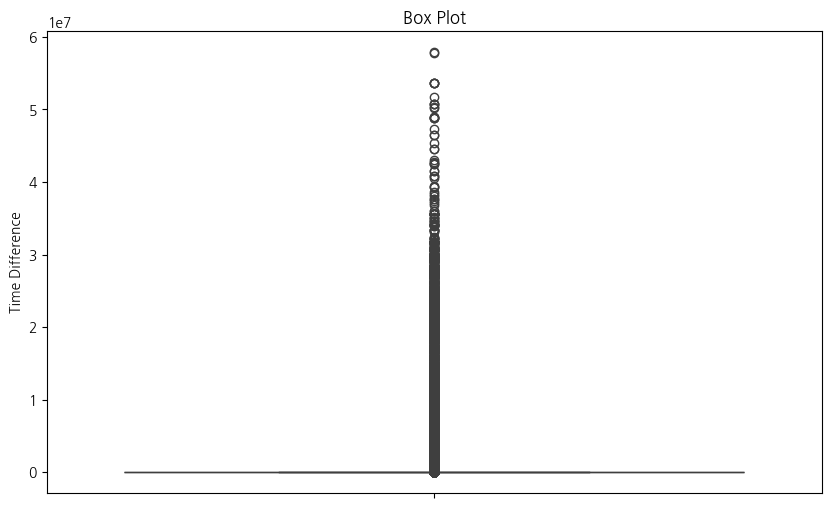

In [78]:
# 박스플롯
plt.figure(figsize=(10, 6))
sns.boxplot(y=matched_df['time_diff'])
plt.title('Box Plot')
plt.ylabel('Time Difference')
plt.show()

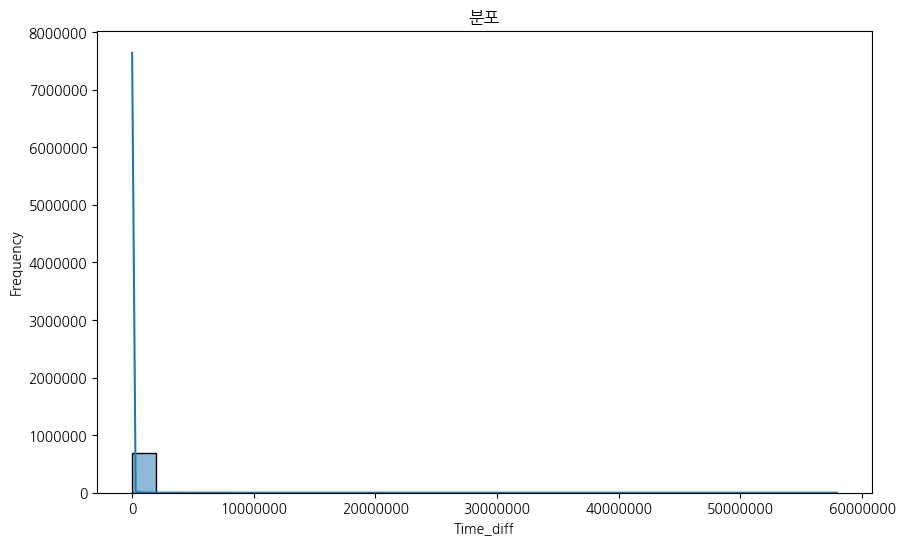

In [79]:
# time_diff 분포
plt.figure(figsize=(10, 6))
sns.histplot(matched_df['time_diff'], bins=30, kde=True)
plt.title('분포')
plt.xlabel('Time_diff')
plt.ylabel('Frequency')

plt.ticklabel_format(style='plain', axis='x')
plt.ticklabel_format(style='plain', axis='y')

plt.show()

- time_diff 60초 이하 삭제

In [80]:
# time_diff가 60이하인 것을 필터링
matched_df_over_60_seconds = matched_df[matched_df['time_diff'] > 60]
len(matched_df_over_60_seconds)

420683

In [81]:
matched_df_over_60_seconds.isna().sum()

user_id                0
event_time             0
event_type_enter       0
content_id             0
lesson_id              0
event_time_complete    0
event_type_complete    0
time_diff              0
dtype: int64

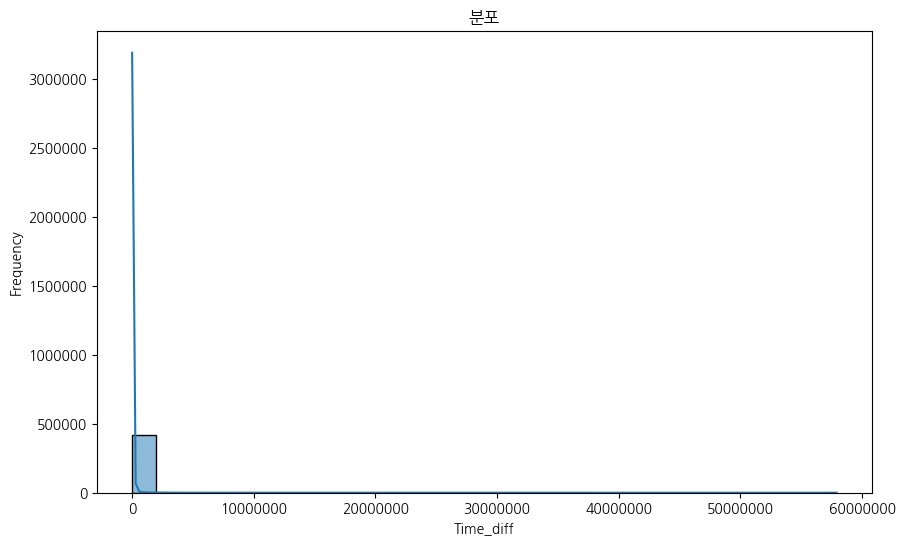

In [82]:
# time_diff 분포
plt.figure(figsize=(10, 6))
sns.histplot(matched_df_over_60_seconds['time_diff'], bins=30, kde=True)
plt.title('분포')
plt.xlabel('Time_diff')
plt.ylabel('Frequency')

plt.ticklabel_format(style='plain', axis='x')
plt.ticklabel_format(style='plain', axis='y')

plt.show()

In [83]:
matched_df_over_60_seconds['time_diff'].describe()

count    4.206830e+05
mean     1.025511e+05
std      1.317238e+06
min      6.000100e+01
25%      1.510280e+02
50%      2.777580e+02
75%      6.472265e+02
max      5.790569e+07
Name: time_diff, dtype: float64

In [84]:
len(matched_df)

3388959

In [85]:
# 75%
percent_75 = matched_df_over_60_seconds['time_diff'].describe()['75%']

# 75% 이하인 값들만 필터링
filtered_data = matched_df_over_60_seconds[matched_df_over_60_seconds['time_diff'] <= percent_75]
len(filtered_data)

315512

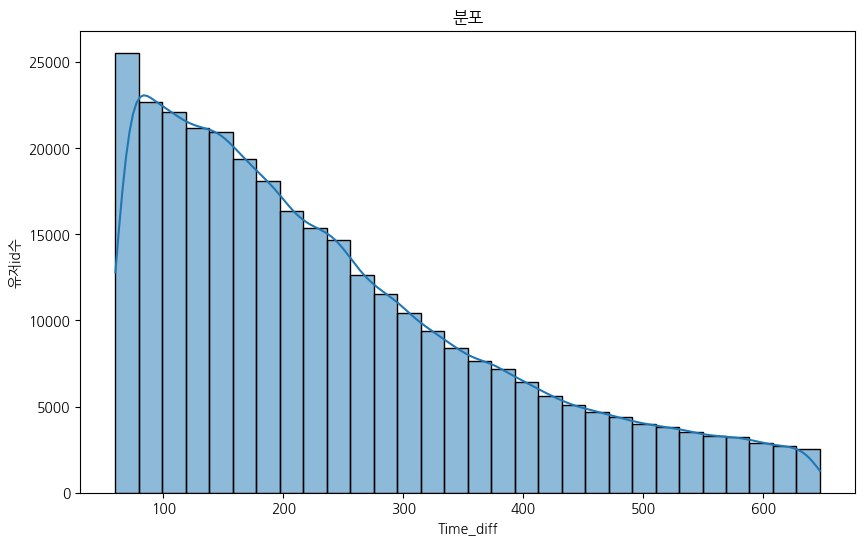

In [86]:
# time_diff 분포
plt.figure(figsize=(10, 6))
sns.histplot(filtered_data['time_diff'], bins=30, kde=True)
plt.title('분포')
plt.xlabel('Time_diff')
plt.ylabel('유저id수')

plt.ticklabel_format(style='plain', axis='x')
plt.ticklabel_format(style='plain', axis='y')

plt.show()

In [87]:
matched_df[matched_df['event_time_complete'].isna()]

,user_id,event_time,event_type_enter,content_id,lesson_id,event_time_complete,event_type_complete,time_diff
0,28562e887d0942c8f422f1ffa1c12bc0,2022-01-01 09:30:37.101,enter,38df90d4de533d6296b52c6a1d90e26b,80aac6e426ef54f462cc4e3fea699e0c,NaT,NaN,NaN
12,459c1fe98bb5a1024f942c06c9883615,2022-01-01 11:01:39.394,enter,68a3658f1b936bfff3bd6960cd561b0a,b6d8e9e372cf4f12984572698db58739,NaT,complete,NaN
13,dffa3c95fccc9fb9d341dec064c7b390,2022-01-01 12:02:09.333,enter,101e1d0dcc38d9c86156f008a145083e,e1853746c4dc666795b5c69676cc3bd1,NaT,complete,NaN
14,dffa3c95fccc9fb9d341dec064c7b390,2022-01-01 12:11:29.416,enter,101e1d0dcc38d9c86156f008a145083e,dc1ebb970edca58235ac1315cf5b4efc,NaT,NaN,NaN
15,dffa3c95fccc9fb9d341dec064c7b390,2022-01-01 12:14:30.221,enter,101e1d0dcc38d9c86156f008a145083e,e1853746c4dc666795b5c69676cc3bd1,NaT,complete,NaN
...,...,...,...,...,...,...,...,...
3389296,7b0e13e15554512df3c5cec123dcea6d,2023-12-31 23:49:15.764,enter,634f93f037bb2c534c2f99fdd16a04f0,bf5757d9fd7fbb7f8fbc1e2657326aaf,NaT,NaN,NaN
3389298,2e96e01bb82372d697a37e4e97c21dcd,2023-12-31 23:51:29.275,enter,c8e53577758bf66711094352a5abd8c3,dda87259e23f07283671639769cf8c41,NaT,NaN,NaN
3389299,c2f379460037197dd941fd1fc2fc87f4,2023-12-31 23:51:53.823,enter,61b6463287573f00de13a930805a52d6,09c8a2d29087cb3d47823acb5f2705e3,NaT,NaN,NaN
3389301,073e8f07e99a1ff2527022bed96266f2,2023-12-31 23:58:12.919,enter,c8e53577758bf66711094352a5abd8c3,501ca50ff5f76d8a619aec225022d76d,NaT,NaN,NaN


In [88]:
matched_df[matched_df['user_id'] == '2e96e01bb82372d697a37e4e97c21dcd']

,user_id,event_time,event_type_enter,content_id,lesson_id,event_time_complete,event_type_complete,time_diff
3380868,2e96e01bb82372d697a37e4e97c21dcd,2023-12-21 14:07:18.816,enter,c8e53577758bf66711094352a5abd8c3,bde4c6ffb1e9f5632d6d0e5574718e02,NaT,NaN,NaN
3383286,2e96e01bb82372d697a37e4e97c21dcd,2023-12-24 21:22:27.653,enter,c8e53577758bf66711094352a5abd8c3,bde4c6ffb1e9f5632d6d0e5574718e02,NaT,NaN,NaN
3387925,2e96e01bb82372d697a37e4e97c21dcd,2023-12-29 21:40:42.478,enter,c8e53577758bf66711094352a5abd8c3,bbdac4eb27b5adcd3cb02e633e624b1c,NaT,NaN,NaN
3387957,2e96e01bb82372d697a37e4e97c21dcd,2023-12-29 22:13:54.735,enter,c8e53577758bf66711094352a5abd8c3,67f1ee328b748d53ab662809c0623584,NaT,complete,NaN
3387958,2e96e01bb82372d697a37e4e97c21dcd,2023-12-29 22:14:25.843,enter,c8e53577758bf66711094352a5abd8c3,67f1ee328b748d53ab662809c0623584,NaT,complete,NaN
3387959,2e96e01bb82372d697a37e4e97c21dcd,2023-12-29 22:15:23.304,enter,c8e53577758bf66711094352a5abd8c3,67f1ee328b748d53ab662809c0623584,NaT,complete,NaN
3387961,2e96e01bb82372d697a37e4e97c21dcd,2023-12-29 22:17:03.591,enter,c8e53577758bf66711094352a5abd8c3,67f1ee328b748d53ab662809c0623584,NaT,complete,NaN
3387963,2e96e01bb82372d697a37e4e97c21dcd,2023-12-29 22:18:48.090,enter,c8e53577758bf66711094352a5abd8c3,67f1ee328b748d53ab662809c0623584,NaT,complete,NaN
3387965,2e96e01bb82372d697a37e4e97c21dcd,2023-12-29 22:19:52.718,enter,c8e53577758bf66711094352a5abd8c3,67f1ee328b748d53ab662809c0623584,NaT,complete,NaN
3388004,2e96e01bb82372d697a37e4e97c21dcd,2023-12-29 23:13:15.381,enter,c8e53577758bf66711094352a5abd8c3,b735dd2fac4ffeed376725e15732f23b,2023-12-29 23:16:40.606,complete,205.225


In [89]:
matched_df[(matched_df['user_id'] == '2e96e01bb82372d697a37e4e97c21dcd')]
#  & (matched_df['lesson_id'] == 'b735dd2fac4ffeed376725e15732f23b')



,user_id,event_time,event_type_enter,content_id,lesson_id,event_time_complete,event_type_complete,time_diff
3380868,2e96e01bb82372d697a37e4e97c21dcd,2023-12-21 14:07:18.816,enter,c8e53577758bf66711094352a5abd8c3,bde4c6ffb1e9f5632d6d0e5574718e02,NaT,NaN,NaN
3383286,2e96e01bb82372d697a37e4e97c21dcd,2023-12-24 21:22:27.653,enter,c8e53577758bf66711094352a5abd8c3,bde4c6ffb1e9f5632d6d0e5574718e02,NaT,NaN,NaN
3387925,2e96e01bb82372d697a37e4e97c21dcd,2023-12-29 21:40:42.478,enter,c8e53577758bf66711094352a5abd8c3,bbdac4eb27b5adcd3cb02e633e624b1c,NaT,NaN,NaN
3387957,2e96e01bb82372d697a37e4e97c21dcd,2023-12-29 22:13:54.735,enter,c8e53577758bf66711094352a5abd8c3,67f1ee328b748d53ab662809c0623584,NaT,complete,NaN
3387958,2e96e01bb82372d697a37e4e97c21dcd,2023-12-29 22:14:25.843,enter,c8e53577758bf66711094352a5abd8c3,67f1ee328b748d53ab662809c0623584,NaT,complete,NaN
3387959,2e96e01bb82372d697a37e4e97c21dcd,2023-12-29 22:15:23.304,enter,c8e53577758bf66711094352a5abd8c3,67f1ee328b748d53ab662809c0623584,NaT,complete,NaN
3387961,2e96e01bb82372d697a37e4e97c21dcd,2023-12-29 22:17:03.591,enter,c8e53577758bf66711094352a5abd8c3,67f1ee328b748d53ab662809c0623584,NaT,complete,NaN
3387963,2e96e01bb82372d697a37e4e97c21dcd,2023-12-29 22:18:48.090,enter,c8e53577758bf66711094352a5abd8c3,67f1ee328b748d53ab662809c0623584,NaT,complete,NaN
3387965,2e96e01bb82372d697a37e4e97c21dcd,2023-12-29 22:19:52.718,enter,c8e53577758bf66711094352a5abd8c3,67f1ee328b748d53ab662809c0623584,NaT,complete,NaN
3388004,2e96e01bb82372d697a37e4e97c21dcd,2023-12-29 23:13:15.381,enter,c8e53577758bf66711094352a5abd8c3,b735dd2fac4ffeed376725e15732f23b,2023-12-29 23:16:40.606,complete,205.225


In [90]:
print(matched_df['content_id'].nunique())
print(matched_df['lesson_id'].nunique())

125
4721


In [91]:
# matched_df에서 각 content_id가 가지고 있는 유니크한 lesson_id들이 알고 싶어
unique_lessons_per_content = matched_df.groupby('content_id')['lesson_id'].unique().reset_index()

# 결과 출력
unique_lessons_per_content

,content_id,lesson_id
0,03b4a290c08f7fa83933827a994f2e61,"[a9749da382f77869ceccb8b69ff01a3e, e4b37510a5a95f12355d86c3ef4bfd8c, bb63bb4376474ea1e52a3014dff145cf, fcd3380136fd3daa8d2da8fa49ab5969, d3bb803194ae048d7d2bbb8b72b547e1, 55dac7049e5823982b32388f34c76770, 236d1903374d4dcd9a03cb01c94511c2, 03f3025bd224f28efa9ef7a2e87c4d2d, 92163c9dbfe75035d012389a228c60c6, 94a728f5ec011c929959bad788c8e036, 308de77179c784adee31aa6e9d5862f3, 21282fea2689b48bd8b5ced7e154c1f9, 2c86f040a7fad407ca0e19bafb86d93d, 8928d5f3ba302c1215ded6dae60e8240, 48f2f172b3368bdb9c584a7b13cac8a8, 5d2374dbabc563331949cbdd83ad64af, abbb15ea313bd4594541ef5b4a3cb550, a01b3f70a604236c7f5b1e8983640cdc, 58186841b615aae6d1827c6579f44272, 9b4e99d8f88c34659449f628f347dd98, 30db744105e88b78888038b96c8a186b, 829fded00fafa6e8db7214faea2b1d61, 8cfe849d4f3a965994a15dda895c125f, 8ccc80839a6bb163304166751ef0fa95, 58de70d21ca0072956307c6fbd858364]"
1,0ab2b890d4068c1490b89676773256f6,"[c948f98ab6713c7b715c4f74054b4c73, 191d0c03e6848797f9fa5153aa616438, 66a846e95fba4256d4cd0bb71582cae0, ce6c92cfa53e348e7d346ae3d2efae7d, 5687a5778b0f6b3398e703af2d777ccd, 5e84673497c3db66ac8e05109749772e, 8ad24901ef79595d8973f9c567cfb90f, 7106431d427bb03dbfc0f9d966955d01, 69e59633f252b3dfd8303a452dea0b5d, 451a8b61232a1a08dc99efd4a773ccd2, 6ff0a6c2972118c5a1c487a18bf6936c, 02cfc5057ed60a45e5143c5affdef8ca, fa4928b3a0cd9481738266441cba8620, 767d09cca8754b6a86d045477029d6ed, 0c01dad71bbf0345e83d1a7a4e793721, 0d855489e707c8ac25935d9978a1eace, 1e01c974ca6c935d89aea4597a4cdaba, a0319f08553596fcc530641a78600b4d, e36e897bc0a68a915655f22550f1a738, 5d429fed205c7b5b9b4f83676cf2739f, 2372898031c70d8cf7e9d4739ee3e1e6, 6ab2a5760bdecd71de77e3b97efc6533, 9ecf97656c7c02da51f984d16ceb91c4, e6d302b7b1abbae253ded72c13c50a19]"
2,101e1d0dcc38d9c86156f008a145083e,"[e1853746c4dc666795b5c69676cc3bd1, dc1ebb970edca58235ac1315cf5b4efc, 87600c3743298dc45b0c878e7b287461, 1dea2f07ee54115f94c1d72621f97127, af179ad50a66a246b48b22f3c7f9c2b2, e62f6075366c292d1838db0b9d28b9e0, 106e966e2c82fc6d1fde5120882cbfae, 7137d2ad48810063139918307de88b66, 5560cf19f95c5fe7d06a24e621b6866d, 80e8e72bc925e612ecae2101fb4f12d9, 67e3892c3d2794770ebf25336099bf93, 8ef3b4e819179973a0ec51e6a59310b2, db8d6c7fe8ec23f18a9a2843cd1b8fcb, eeeaaf310a930eafcef8fea6b895f4ff, 6f4c0c891d3b99f3cf46f5e55c4c435a, 2fba0e44051fee8a23e14bf223d58238, 88568c6e0bbc21f497e4ff1825fc7a39, e35be435ba71656df6f2d7d2d1cf0fab, 32474dac6320362d69a6c809822fe79d, 133d82a29d985888ecbc1c4ff86c9511, d19780b219ac891a1578f0d93237b46c, 9492cf47a34fe8a6a27c8de2c96cfd25, 8ff074d13d4cabe6edfab84143882189, e27a81a4762dc823963e93b0f89c0200, 2f8872fe64504c703218a725470801cb, 734134a4687e76b80b0382d08aa90dcc, 8dda515db1661aee2ab2535490174f6f, cbb257f3eb4a53f415547045c0e4b296, 3616345a3ac423530ae5eb8f40465166, d99dfe3d144ca2be5db9a80e05d425b2, b90d9a8237d73209be1e5b649711316e, 31dadcbb29304466c5c7ad242463e796, 8a80317e025ac47c902971f3d43144b7, 05a6b1fdfbee53d9d97ac7624909764f, de4d57760f7c16a506ba128abb5f934c, 1a4fc0000f536f396588d49137c35ed9, a95b457863d3d0a0d836f3b3f1036765, ecb863ab78bcd2ad3c58bab674ffa5cd, 6eca8183772d0c6aa64be088e74cee4e, 2c86d09876ff7b5cc9b20a6abcd03b43, c956f2c268724ded0cc9d9130f19fac2, 8d9389ede02cbe7e1fb38bb35a53cb31, eb0d6f2df3f36e10d3a70cbb882bb363, 798a3fae01ca67903926a15150116b18, 3b9dc769d13d4a0fbbb159a7d3fd728d, 0d4e6ba1f989e283b77e6ee903e5f04b, 70dee5eec91177a15ab7e48bcf1e7cf3, 3f19677e6c54ad480e60b4b3eb5a9a4d, f67493d7224f1087f2a962e9cc501076, 4a4ab2d0d8f4ef7407a2621b901ec6c1, 06eb5bdc87ccc557c6b103e119448d04, f54926fd64c7abd77506c85860117055, 5c0fcc71707e65da29c787cc8caaa72a, 4286e20d1086c786f6fe37a4bd405025, b8a84874f306fc6372551777553ff0ca, 84d133ee78f61b985779fb4ee3ead34d, 2920b1b3dc42c172f2ad0e8d5d71fe96, 7aff9fcce8a2d5bf67a2d97c869beda8, 82167b001f4dfdeb28a26407ed82d55a, 5cb2503167eeab3d420f24f645e0151c, 223d6e75237292c41a22bf6291f557d1, f467f946bd3c69a2e56bc308ceb85bce, f3d502b8b7c6f54a623fdaa26b35a476, 84231092b995a6e5aea4c001bb8687df, 8d8edfd2bf5137a64d120c9

In [92]:
# 각 content_id가 가지고 있는 유니크한 lesson_id들을 구하기
unique_lessons_per_content = matched_df.groupby('content_id')['lesson_id'].unique().reset_index()

# 각 lesson_id의 time_diff 값의 최소, 최대값 구하기
time_diff_stats = matched_df.groupby('lesson_id')['time_diff'].agg(['min', 'max', 'mean']).reset_index()

# 결과 출력
time_diff_stats.head()

,lesson_id,min,max,mean
0,001e4570bb0fc346a1c969b019bdc22b,NaN,NaN,NaN
1,0021f3a8597cb32f3605631446baf526,0.034,220465.650,3877.365825
2,00332b815a82ca3244f1e1eb72345390,20.076,3199.557,864.946250
3,00375453dc564db84a8ae379afdd8f1c,25.211,43.176,34.193500
4,004ef3cba567728cae74e0a22a8d3419,0.152,40328.726,442.111406


In [93]:
# 각 lesson_id의 time_diff 값의 최소, 최대값, 평균값, 75% 지점 값 구하기
time_diff_stats = matched_df.groupby('lesson_id')['time_diff'].agg(['min', 'max', 'mean', lambda x: x.quantile(0.75)]).reset_index()

# 열 이름 변경
time_diff_stats.columns = ['lesson_id', 'min', 'max', 'mean', '75%']

# 결과 출력
time_diff_stats.head(20)

,lesson_id,min,max,mean,75%
0,001e4570bb0fc346a1c969b019bdc22b,NaN,NaN,NaN,NaN
1,0021f3a8597cb32f3605631446baf526,0.034,2.204656e+05,3877.365825,994.96650
2,00332b815a82ca3244f1e1eb72345390,20.076,3.199557e+03,864.946250,930.09450
3,00375453dc564db84a8ae379afdd8f1c,25.211,4.317600e+01,34.193500,38.68475
4,004ef3cba567728cae74e0a22a8d3419,0.152,4.032873e+04,442.111406,148.40375
5,004efd22b4402b9cba62a2d0ccf5f16f,0.019,4.256489e+05,2008.013329,383.04500
6,0057135b48d44582f5200b1c1aa7c1d5,0.018,4.068795e+05,3312.751142,475.02200
7,005856a52c06fe0cc6f3ba8c5a327055,0.009,2.558501e+05,7135.551191,116.53250
8,005ba81ba626417f8f0eb301e1728c93,0.007,1.576918e+07,108637.161231,180.39400
9,0062f5a29416996e62e51fd6ad55dd57,0.001,1.279427e+06,59248.778857,17.26650


In [94]:
time_diff_stats['75%'].max()

13912812.969

In [95]:
time_diff_stats[time_diff_stats['75%'] == time_diff_stats['75%'].max()]

,lesson_id,min,max,mean,75%
2401,821d67670eeb4daba17399d378ca33dc,214.928,2.782470e+07,9.275280e+06,1.391281e+07


In [96]:
top_10_75_percentile = time_diff_stats.nlargest(10, '75%')
top_10_75_percentile

,lesson_id,min,max,mean,75%
2401,821d67670eeb4daba17399d378ca33dc,214.928,2.782470e+07,9.275280e+06,1.391281e+07
1916,67f0be43a1afe7c0b2e8a6c75af24381,127.971,3.201925e+07,8.005001e+06,8.005090e+06
2080,70ab4eebc9df3a387eaca589774c6272,0.114,5.338100e+06,2.168681e+06,3.836950e+06
1998,6c611a02681cc99acbd655f164831ea8,1896858.423,1.896858e+06,1.896858e+06,1.896858e+06
557,1eaf3cff7d4a04214e149144dad65741,1893462.102,1.893462e+06,1.893462e+06,1.893462e+06
3512,be529fb9eae627e0158fbc37b4290aca,1892515.809,1.892516e+06,1.892516e+06,1.892516e+06
4273,e61d9f4270514440524480a417ddab46,36.047,3.352408e+06,1.117538e+06,1.676289e+06
2082,70bae70a5fd382b4708d6f4cc89b1870,18.498,1.893371e+06,9.466950e+05,1.420033e+06
4160,dff0eb0fbe0bab5b597ed3c476593a7c,1065292.842,1.065293e+06,1.065293e+06,1.065293e+06
1496,531c2f4a961555a3b9d845c20c3f387a,1.479,1.893255e+06,6.311172e+05,9.466751e+05


<Axes: xlabel='75%', ylabel='Count'>

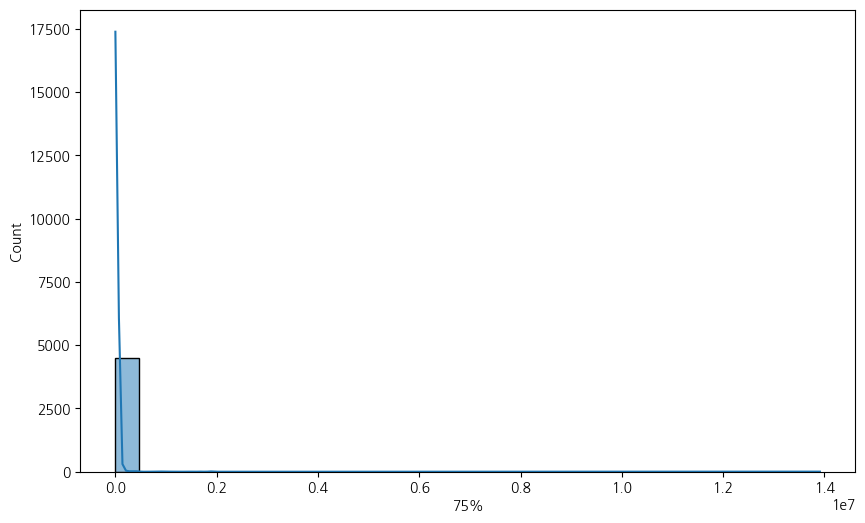

In [97]:
# 75% 지점을 histplot 그래프로 그리기
plt.figure(figsize=(10, 6))
sns.histplot(time_diff_stats['75%'], bins=30, kde=True)

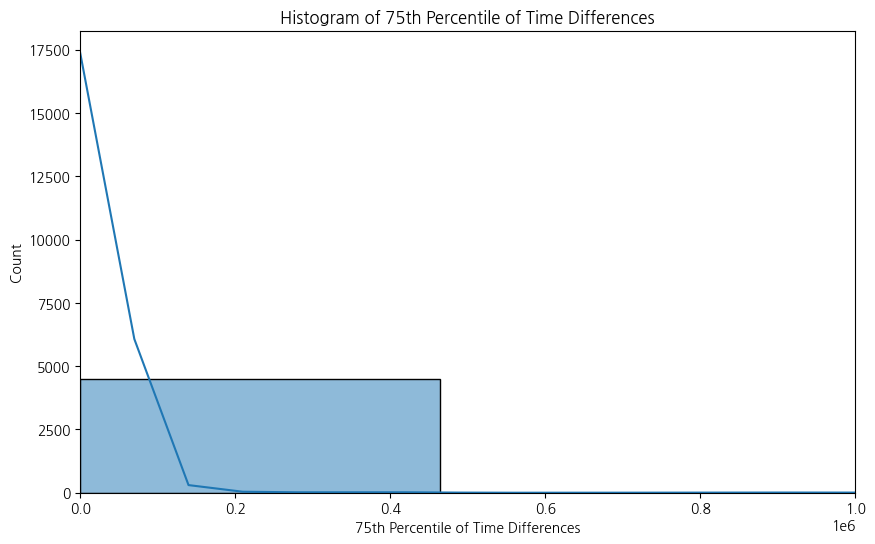

In [98]:
# 75% 지점을 histplot 그래프로 그리기
plt.figure(figsize=(10, 6))
sns.histplot(time_diff_stats['75%'], bins=30, kde=True)
plt.title('Histogram of 75th Percentile of Time Differences')
plt.xlabel('75th Percentile of Time Differences')
plt.ylabel('Count')

# x축 범위 조정 (예: 0에서 1e6까지)
plt.xlim(0, 1e6)

plt.show()

In [99]:
# 75% 지점도 지나치게 높은 이상치가 있음. 중앙값으로 확인하기기

# 각 lesson_id의 time_diff 값의 최소, 최대값, 평균값, 중앙값, 75% 지점 값 구하기
time_diff_stats = matched_df.groupby('lesson_id')['time_diff'].agg(['min', 'max', 'mean', 'median', lambda x: x.quantile(0.75)]).reset_index()

# 열 이름 변경
time_diff_stats.columns = ['lesson_id', 'min', 'max', 'mean', 'median', '75%']

# 결과 출력
time_diff_stats.head(20)

,lesson_id,min,max,mean,median,75%
0,001e4570bb0fc346a1c969b019bdc22b,NaN,NaN,NaN,NaN,NaN
1,0021f3a8597cb32f3605631446baf526,0.034,2.204656e+05,3877.365825,346.5295,994.96650
2,00332b815a82ca3244f1e1eb72345390,20.076,3.199557e+03,864.946250,120.0760,930.09450
3,00375453dc564db84a8ae379afdd8f1c,25.211,4.317600e+01,34.193500,34.1935,38.68475
4,004ef3cba567728cae74e0a22a8d3419,0.152,4.032873e+04,442.111406,88.9505,148.40375
5,004efd22b4402b9cba62a2d0ccf5f16f,0.019,4.256489e+05,2008.013329,261.0210,383.04500
6,0057135b48d44582f5200b1c1aa7c1d5,0.018,4.068795e+05,3312.751142,292.0190,475.02200
7,005856a52c06fe0cc6f3ba8c5a327055,0.009,2.558501e+05,7135.551191,19.5330,116.53250
8,005ba81ba626417f8f0eb301e1728c93,0.007,1.576918e+07,108637.161231,121.7950,180.39400
9,0062f5a29416996e62e51fd6ad55dd57,0.001,1.279427e+06,59248.778857,1.2380,17.26650


In [100]:
top_10_median = time_diff_stats.nlargest(10, 'median')
top_10_median

,lesson_id,min,max,mean,median,75%
1998,6c611a02681cc99acbd655f164831ea8,1896858.423,1896858.423,1.896858e+06,1.896858e+06,1.896858e+06
557,1eaf3cff7d4a04214e149144dad65741,1893462.102,1893462.102,1.893462e+06,1.893462e+06,1.893462e+06
3512,be529fb9eae627e0158fbc37b4290aca,1892515.809,1892515.809,1.892516e+06,1.892516e+06,1.892516e+06
2080,70ab4eebc9df3a387eaca589774c6272,0.114,5338100.236,2.168681e+06,1.668311e+06,3.836950e+06
4160,dff0eb0fbe0bab5b597ed3c476593a7c,1065292.842,1065292.842,1.065293e+06,1.065293e+06,1.065293e+06
2082,70bae70a5fd382b4708d6f4cc89b1870,18.498,1893371.419,9.466950e+05,9.466950e+05,1.420033e+06
2839,996826052e61aeef7d5d04d436c12cb8,943875.666,943875.666,9.438757e+05,9.438757e+05,9.438757e+05
2012,6d13587c78a1e0075a02e45a6bc7cf24,759568.916,759568.916,7.595689e+05,7.595689e+05,7.595689e+05
1068,3adcaf4ac50938e530334de392d8a30c,0.933,1125678.414,5.628397e+05,5.628397e+05,8.442590e+05
1366,4bb46574b54ba18e13ffc65a40c1bd71,384813.749,384813.749,3.848137e+05,3.848137e+05,3.848137e+05


- 시간차가 이렇게 큰 경우가 무엇일까 생각해보았음.
- 제일 첫 enter와 마지막 complete를 매치시키면 오늘 듣다 말고 한참 뒤에 다시 들어가서 수강한 경우가 있을 것 같다.
- 24 시간 이내에 시작, 완료가 찍힌 것들로 다시 필터링하면 괜찮지 않을까?
- 24시간으로 설정한 이유는 밤 11시 넘어서 시작해서 날이 넘어가는 경우가 있을 것이기 때문. 밑의 그래프를 근거라고 볼 수 있음.

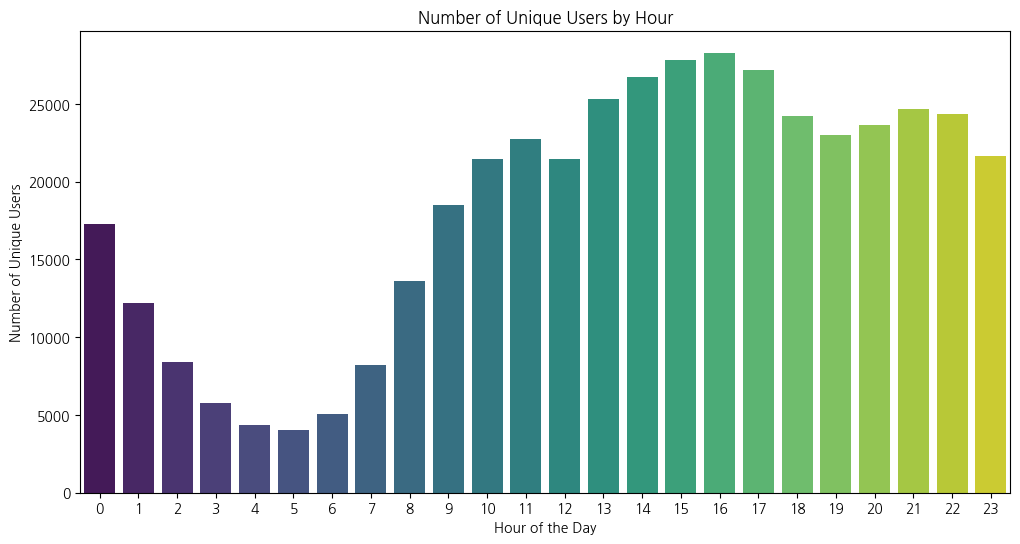

In [101]:
# 24시간 시작, 끝이 모두 있는 데이터만 필터링

# event_time_complete와 event_time을 datetime 형식으로 변환
matched_df['event_time_complete'] = pd.to_datetime(matched_df['event_time_complete'])
matched_df['event_time'] = pd.to_datetime(matched_df['event_time'])

# complete_df와 enter_df를 matched_df와 병합 (user_id, content_id, lesson_id를 기준으로 병합)
complete_df = matched_df[['user_id', 'content_id', 'lesson_id', 'event_time_complete']]
enter_df = matched_df[['user_id', 'content_id', 'lesson_id', 'event_time']]

# 병합하여 event_time과 event_time_complete 사이의 시간 차이 계산
merged_df = pd.merge(complete_df, enter_df, on=['user_id', 'content_id', 'lesson_id'], suffixes=('_complete', '_enter'))

# 병합된 데이터프레임의 열 이름 확인
print(merged_df.columns)

# 시간 차이를 초 단위로 계산
merged_df['time_diff'] = (merged_df['event_time_complete'] - merged_df['event_time']).dt.total_seconds()

# 시간 차이가 24시간(86400초) 이내인 경우만 필터링
filtered_df = merged_df[merged_df['time_diff'] <= 86400]

# 결과 출력
filtered_df

Index(['user_id', 'content_id', 'lesson_id', 'event_time_complete',
       'event_time'],
      dtype='object')


,user_id,content_id,lesson_id,event_time_complete,event_time,time_diff
1,459c1fe98bb5a1024f942c06c9883615,68a3658f1b936bfff3bd6960cd561b0a,1238493aafb242e6bb8b6891271fa8a9,2022-01-01 10:28:15.544,2022-01-01 10:25:19.668,1.758760e+02
2,459c1fe98bb5a1024f942c06c9883615,68a3658f1b936bfff3bd6960cd561b0a,54dd3f1d5ccc6ed8f75c99d4b92feacf,2022-01-01 10:35:04.805,2022-01-01 10:28:16.287,4.085180e+02
3,459c1fe98bb5a1024f942c06c9883615,68a3658f1b936bfff3bd6960cd561b0a,54dd3f1d5ccc6ed8f75c99d4b92feacf,2022-01-01 10:35:04.805,2022-05-03 23:26:17.427,-1.058707e+07
4,459c1fe98bb5a1024f942c06c9883615,68a3658f1b936bfff3bd6960cd561b0a,1ec838a253800869b1724bbb1da49376,2022-01-01 10:43:47.151,2022-01-01 10:35:04.612,5.225390e+02
5,459c1fe98bb5a1024f942c06c9883615,68a3658f1b936bfff3bd6960cd561b0a,50c9c2132fc891b215cf5ab9647f2476,2022-01-01 10:45:38.806,2022-01-01 10:43:47.037,1.117690e+02
...,...,...,...,...,...,...
17666903,7076bfc876954e044e60c37dfa9cd36d,d6227ba76134f6cf821bb98b5f235bd0,ca8fc4063166c5c32652a2ed9b3ca6fb,2023-12-31 23:48:43.737,2023-12-31 23:46:32.379,1.313580e+02
17666904,481247c0a2d1dcc3a0ed3e8db9f46ccb,b314d5aba64a0aab40602cb72a4a1504,9c9ce3ab4cc3c6f11634a527f39de056,2023-12-31 23:53:19.714,2023-12-31 23:47:45.432,3.342820e+02
17666905,6bb6a6abf52d45673b14ae511d33db8d,c8e53577758bf66711094352a5abd8c3,b7d5d38f49d78cdbcfe01c9c96051159,2023-12-31 23:49:51.407,2023-12-31 23:48:43.087,6.832000e+01
17666909,772a0f028f7ac03ebba57c7e0f8f73fe,61b6463287573f00de13a930805a52d6,6e3afbeb4942c6c29038321e5995f4f1,2023-12-31 23:54:06.177,2023-12-31 23:50:19.682,2.264950e+02


In [102]:
filtered_df[filtered_df['time_diff'] < 0]

,user_id,content_id,lesson_id,event_time_complete,event_time,time_diff
3,459c1fe98bb5a1024f942c06c9883615,68a3658f1b936bfff3bd6960cd561b0a,54dd3f1d5ccc6ed8f75c99d4b92feacf,2022-01-01 10:35:04.805,2022-05-03 23:26:17.427,-1.058707e+07
135,dffa3c95fccc9fb9d341dec064c7b390,101e1d0dcc38d9c86156f008a145083e,8ef3b4e819179973a0ec51e6a59310b2,2022-01-01 13:55:25.140,2022-01-02 22:17:53.446,-1.165483e+05
162,459c1fe98bb5a1024f942c06c9883615,db1819d3a7a4c4d85dccb3b9e982fbcd,cad0f7309a02bdccbf79ffb32a2ada03,2022-01-01 14:11:48.529,2022-01-01 14:14:45.927,-1.773980e+02
190,459c1fe98bb5a1024f942c06c9883615,db1819d3a7a4c4d85dccb3b9e982fbcd,6b0f7485e42d63e4ab12b63d2127079c,2022-01-01 15:11:56.108,2022-01-01 15:13:07.655,-7.154700e+01
216,459c1fe98bb5a1024f942c06c9883615,db1819d3a7a4c4d85dccb3b9e982fbcd,8db6adddb7710add9fef6b04a3ee4ea4,2022-01-01 15:34:15.890,2022-01-02 16:12:20.687,-8.868480e+04
...,...,...,...,...,...,...
17665864,833e7ace0f0143932c8d54799dd0efe9,ff7998135d650dbefb3f479c900cbcc7,cc62b4ad9a105332e30c442b0ab115cb,2023-12-31 08:34:11.456,2023-12-31 08:35:30.332,-7.887600e+01
17666096,8deb23021af4943a1832958e13b67030,a914987711c7e2db9fd4bff7555ec87c,5a1ff0b618b1258b8a8d7671d8fa2957,2023-12-31 13:46:37.953,2023-12-31 13:46:58.795,-2.084200e+01
17666120,00fc29415ceeb756281be0bc58a7273f,d6227ba76134f6cf821bb98b5f235bd0,38854d8b43ad9b98664e9571cda62fb3,2023-12-31 14:05:27.563,2023-12-31 14:12:13.839,-4.062760e+02
17666741,bce3f1086d6dc578813eeba495e495f6,c8e53577758bf66711094352a5abd8c3,2c7074e0e468c6074c31bedfd41ea97d,2023-12-31 22:18:05.741,2023-12-31 22:34:00.659,-9.549180e+02


In [103]:
filtered_df[(filtered_df['user_id'] == '8deb23021af4943a1832958e13b67030') & 
                            (filtered_df['lesson_id'] == '5a1ff0b618b1258b8a8d7671d8fa2957')]



,user_id,content_id,lesson_id,event_time_complete,event_time,time_diff
17666095,8deb23021af4943a1832958e13b67030,a914987711c7e2db9fd4bff7555ec87c,5a1ff0b618b1258b8a8d7671d8fa2957,2023-12-31 13:46:37.953,2023-12-31 13:41:46.584,291.369
17666096,8deb23021af4943a1832958e13b67030,a914987711c7e2db9fd4bff7555ec87c,5a1ff0b618b1258b8a8d7671d8fa2957,2023-12-31 13:46:37.953,2023-12-31 13:46:58.795,-20.842


In [104]:
# time_diff 60초 미만 삭제제
filtered_df = filtered_df[filtered_df['time_diff'] > 60]

In [105]:
filtered_df.describe()

,event_time_complete,event_time,time_diff
count,409991,409991,409991.000000
mean,2022-09-16 10:34:08.252963072,2022-09-16 10:04:21.032134144,1787.220829
min,2022-01-01 10:28:15.544000,2022-01-01 10:25:19.668000,60.001000
25%,2022-05-13 04:02:41.376000,2022-05-13 03:43:27.727500032,148.468000
50%,2022-07-20 12:36:20.067000064,2022-07-20 12:04:39.127000064,269.066000
75%,2022-12-21 15:08:37.020999936,2022-12-21 14:45:31.453000192,587.430000
max,2023-12-31 23:54:06.177000,2023-12-31 23:50:19.682000,86394.841000
std,NaN,NaN,8200.745127


In [106]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 409991 entries, 1 to 17666909
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   user_id              409991 non-null  object        
 1   content_id           409991 non-null  object        
 2   lesson_id            409991 non-null  object        
 3   event_time_complete  409991 non-null  datetime64[ns]
 4   event_time           409991 non-null  datetime64[ns]
 5   time_diff            409991 non-null  float64       
dtypes: datetime64[ns](2), float64(1), object(3)
memory usage: 21.9+ MB


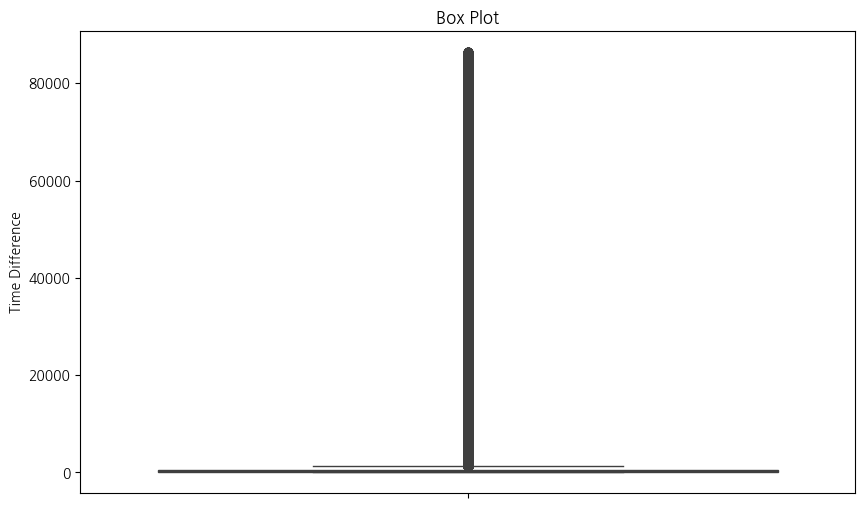

In [107]:
# 박스플롯
plt.figure(figsize=(10, 6))
sns.boxplot(y=filtered_df['time_diff'])
plt.title('Box Plot')
plt.ylabel('Time Difference')
plt.show()

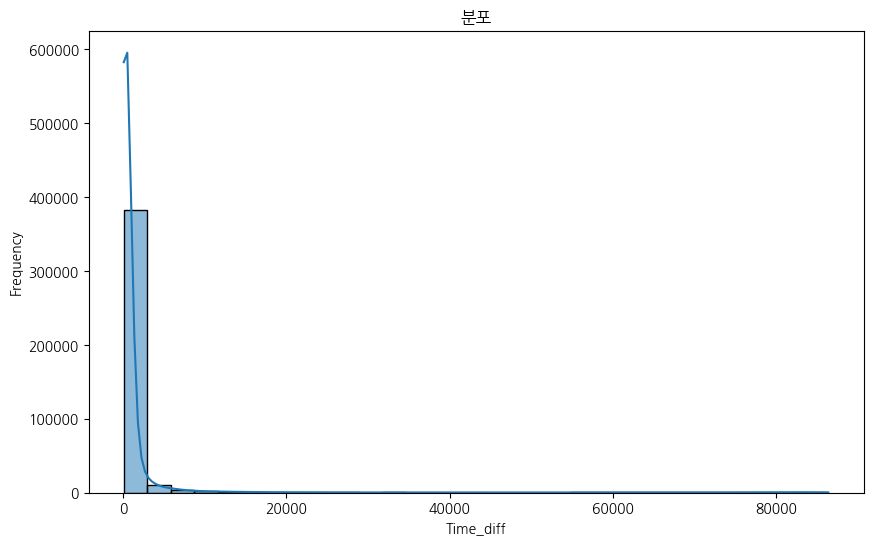

In [108]:
# time_diff 분포
plt.figure(figsize=(10, 6))
sns.histplot(filtered_df['time_diff'], bins=30, kde=True)
plt.title('분포')
plt.xlabel('Time_diff')
plt.ylabel('Frequency')

plt.ticklabel_format(style='plain', axis='x')
plt.ticklabel_format(style='plain', axis='y')

plt.show()

In [109]:
# 'user_id', 'lesson_id', 'event_time_complete' 기준으로 중복된 행 찾기
duplicates = filtered_df.dropna(subset=['event_time_complete'])
duplicates = duplicates[duplicates.duplicated(subset=['user_id', 'lesson_id', 'event_time_complete'], keep=False)]
duplicates

,user_id,content_id,lesson_id,event_time_complete,event_time,time_diff
4127,64ef2c3f10020a887880ee98ef749482,f64c475280676531a31f2f8e0648599c,ff4c3c070c623be2da90a5a84313ecdc,2022-01-10 07:52:42.942,2022-01-10 07:04:42.271,2880.671
4128,64ef2c3f10020a887880ee98ef749482,f64c475280676531a31f2f8e0648599c,ff4c3c070c623be2da90a5a84313ecdc,2022-01-10 07:52:42.942,2022-01-10 07:07:06.703,2736.239
4129,64ef2c3f10020a887880ee98ef749482,f64c475280676531a31f2f8e0648599c,ff4c3c070c623be2da90a5a84313ecdc,2022-01-10 07:52:42.942,2022-01-10 07:08:53.065,2629.877
18949,914f1ce87f1c51b0f1cdf4ff858b4804,68a3658f1b936bfff3bd6960cd561b0a,fafaf3621bdc750a900cea7b8ef04569,2022-01-28 15:55:26.118,2022-01-28 15:39:06.244,979.874
18950,914f1ce87f1c51b0f1cdf4ff858b4804,68a3658f1b936bfff3bd6960cd561b0a,fafaf3621bdc750a900cea7b8ef04569,2022-01-28 15:55:26.118,2022-01-28 15:44:37.802,648.316
...,...,...,...,...,...,...
17654715,5c2ce4062550e53fa30c3f53b8c9b181,61b6463287573f00de13a930805a52d6,2ed4b83e65edc2b1efb193aaa3c60cf9,2023-12-24 21:57:33.775,2023-12-24 18:52:39.840,11093.935
17654716,5c2ce4062550e53fa30c3f53b8c9b181,61b6463287573f00de13a930805a52d6,2ed4b83e65edc2b1efb193aaa3c60cf9,2023-12-24 21:57:33.775,2023-12-24 19:58:29.691,7144.084
17659363,5c2ce4062550e53fa30c3f53b8c9b181,f4be1a0fe0e301b03115591777fddf29,b42c9bb32f5024900cbed7623eecd272,2023-12-27 15:59:30.381,2023-12-26 19:22:36.156,74214.225
17659364,5c2ce4062550e53fa30c3f53b8c9b181,f4be1a0fe0e301b03115591777fddf29,b42c9bb32f5024900cbed7623eecd272,2023-12-27 15:59:30.381,2023-12-26 19:59:08.752,72021.629


In [110]:
filtered_df.describe()


,event_time_complete,event_time,time_diff
count,409991,409991,409991.000000
mean,2022-09-16 10:34:08.252963072,2022-09-16 10:04:21.032134144,1787.220829
min,2022-01-01 10:28:15.544000,2022-01-01 10:25:19.668000,60.001000
25%,2022-05-13 04:02:41.376000,2022-05-13 03:43:27.727500032,148.468000
50%,2022-07-20 12:36:20.067000064,2022-07-20 12:04:39.127000064,269.066000
75%,2022-12-21 15:08:37.020999936,2022-12-21 14:45:31.453000192,587.430000
max,2023-12-31 23:54:06.177000,2023-12-31 23:50:19.682000,86394.841000
std,NaN,NaN,8200.745127


In [111]:
# filtered_df 'user_id', 'lesson_id', 'event_time_complete' 기준으로 중복된 행이 있다면, 그 중 첫 번째 행만 event_time_complete을 남기고 나머지는 NAN으로 변경 후 삭제

# 중복된 행 찾기 (첫 번째 행을 제외한 나머지 행)
duplicates = filtered_df.duplicated(subset=['user_id', 'lesson_id', 'event_time_complete'], keep='first')

# 중복된 행의 event_time_complete을 NaN으로 변경
filtered_df.loc[duplicates, 'event_time_complete'] = pd.NaT

# NaN으로 변경된 행 삭제
filtered_df = filtered_df.dropna(subset=['event_time_complete'])

# 결과 출력
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 409254 entries, 1 to 17666909
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   user_id              409254 non-null  object        
 1   content_id           409254 non-null  object        
 2   lesson_id            409254 non-null  object        
 3   event_time_complete  409254 non-null  datetime64[ns]
 4   event_time           409254 non-null  datetime64[ns]
 5   time_diff            409254 non-null  float64       
dtypes: datetime64[ns](2), float64(1), object(3)
memory usage: 21.9+ MB


In [112]:
filtered_df.describe()

,event_time_complete,event_time,time_diff
count,409254,409254,409254.000000
mean,2022-09-15 23:34:22.366526720,2022-09-15 23:04:55.138611968,1767.227915
min,2022-01-01 10:28:15.544000,2022-01-01 10:25:19.668000,60.001000
25%,2022-05-13 00:03:21.385499904,2022-05-12 23:47:37.461249792,148.369250
50%,2022-07-20 09:26:28.594999808,2022-07-20 08:38:21.658999808,268.677500
75%,2022-12-20 00:50:56.460250112,2022-12-20 00:27:04.267499776,585.720500
max,2023-12-31 23:54:06.177000,2023-12-31 23:50:19.682000,86394.841000
std,NaN,NaN,8131.622692


In [113]:
print(f'유저 수: {filtered_df['user_id'].nunique()}')
print(f'content_id 수: {filtered_df["content_id"].nunique()}')  
print(f'lesson_id 수: {filtered_df["lesson_id"].nunique()}')
print(f'event_time_complete 수: {filtered_df["event_time_complete"].nunique()}')
print(f'time_diff 최소값: {filtered_df["time_diff"].min()}')
print(f'time_diff 최대값: {filtered_df["time_diff"].max()}')
print(f'time_diff 평균값: {filtered_df["time_diff"].mean()}')

유저 수: 11050
content_id 수: 116
lesson_id 수: 4300
event_time_complete 수: 409254
time_diff 최소값: 60.001
time_diff 최대값: 86394.841
time_diff 평균값: 1767.2279147351032


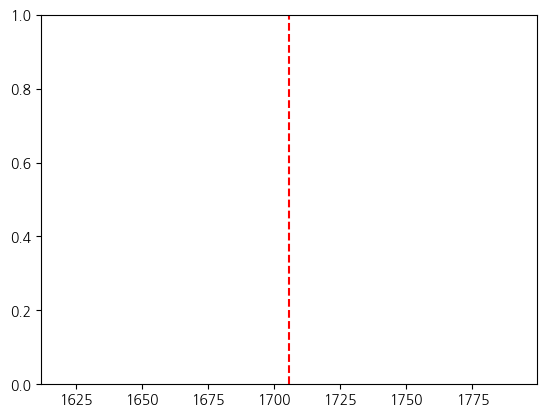

In [114]:
ninety = filtered_df['time_diff'].quantile(0.9)
plt.axvline(ninety, color='red', linestyle='--', label='75% 지점')

#### 해인님이랑 상의할 것!!!
- 거의 24시간이 찍힌 수강 시간이 있음.
- 90% 지점이 9200초(약 28분)
- 이상치 처리 하나???

In [115]:
# user_id 별 time_diff의 합합
user_study_time = filtered_df.groupby('user_id')['time_diff'].sum()

# 데이터프레임으로 변환
user_study_time = user_study_time.reset_index()
user_study_time

,user_id,time_diff
0,0000572f2ba8079bcefd2760b632e820,633.446
1,000087537cbfd934375364218ff10f91,386.183
2,0001f15911b404f3bf5b8571afafa4e4,4920.047
3,000be07bc09ceff42c11978f4a9f1c1a,32811.514
4,001cd989a26ba664b086b92c364dc9cf,7536.299
...,...,...
11045,ffe800abf1a0c00994b2a5b1ce68c681,1050.267
11046,ffe8f08cd65e082952aca5a3110f5601,190648.571
11047,ffefd2c23af0e8de9a5bb9aebc498d07,676.991
11048,fff219b952002818462faa3746343f09,440916.388


In [116]:
user_study_time['time_diff_minute'] = user_study_time['time_diff'] / 60
user_study_time

,user_id,time_diff,time_diff_minute
0,0000572f2ba8079bcefd2760b632e820,633.446,10.557433
1,000087537cbfd934375364218ff10f91,386.183,6.436383
2,0001f15911b404f3bf5b8571afafa4e4,4920.047,82.000783
3,000be07bc09ceff42c11978f4a9f1c1a,32811.514,546.858567
4,001cd989a26ba664b086b92c364dc9cf,7536.299,125.604983
...,...,...,...
11045,ffe800abf1a0c00994b2a5b1ce68c681,1050.267,17.504450
11046,ffe8f08cd65e082952aca5a3110f5601,190648.571,3177.476183
11047,ffefd2c23af0e8de9a5bb9aebc498d07,676.991,11.283183
11048,fff219b952002818462faa3746343f09,440916.388,7348.606467


In [117]:
user_study_time.describe()

,time_diff,time_diff_minute
count,1.105000e+04,11050.000000
mean,6.545204e+04,1090.867410
std,1.411338e+05,2352.229417
min,6.001600e+01,1.000267
25%,2.048676e+03,34.144604
50%,1.231178e+04,205.196333
75%,7.886615e+04,1314.435850
max,3.502326e+06,58372.102483


#### 25%, 50%, 75% 기준으로 유저군 분류

In [118]:
def classify_study_time_groups(df):
    # 1️⃣ 사분위수 계산
    q1 = df['time_diff'].quantile(0.25)  # 1분위 (하위 25%)
    q3 = df['time_diff'].quantile(0.75)  # 3분위 (상위 25%)

    # 2️⃣ 그룹 분류 함수
    def categorize(time_diff):
        if time_diff >= q3:
            return '범생이'   # 공부 많이 한 그룹 (상위 25%)
        elif time_diff <= q1:
            return '금쪽이'    # 공부 안 하는 그룹 (하위 25%)
        else:
            return '평범' # 중간 그룹 (중간 50%)

    # 3️⃣ 그룹 분류 컬럼 추가
    df['study_group'] = df['time_diff'].apply(categorize)

    return df

# user_study_time 데이터프레임에 그룹 분류 적용
user_study_time_with_groups = classify_study_time_groups(user_study_time)

# 결과 출력
user_study_time_with_groups.head()

,user_id,time_diff,time_diff_minute,study_group
0,0000572f2ba8079bcefd2760b632e820,633.446,10.557433,금쪽이
1,000087537cbfd934375364218ff10f91,386.183,6.436383,금쪽이
2,0001f15911b404f3bf5b8571afafa4e4,4920.047,82.000783,평범
3,000be07bc09ceff42c11978f4a9f1c1a,32811.514,546.858567,평범
4,001cd989a26ba664b086b92c364dc9cf,7536.299,125.604983,평범


In [119]:
user_study_time_with_groups['study_group'].value_counts()

study_group
평범     5524
금쪽이    2763
범생이    2763
Name: count, dtype: int64

- 그룹별 describe

In [120]:
user_study_time_with_groups[user_study_time_with_groups['study_group'] == '범생이'].describe()

,time_diff,time_diff_minute
count,2.763000e+03,2763.000000
mean,2.173577e+05,3622.628591
std,2.183479e+05,3639.132328
min,7.886915e+04,1314.485900
25%,9.819219e+04,1636.536433
50%,1.483754e+05,2472.923350
75%,2.404625e+05,4007.708275
max,3.502326e+06,58372.102483


In [121]:
user_study_time_with_groups[user_study_time_with_groups['study_group'] == '평범'].describe()

,time_diff,time_diff_minute
count,5524.000000,5524.000000
mean,21807.713920,363.461899
std,21585.912387,359.765206
min,2048.761000,34.146017
25%,5088.945500,84.815758
50%,12311.780000,205.196333
75%,33083.504750,551.391746
max,78857.142000,1314.285700


In [122]:
user_study_time_with_groups[user_study_time_with_groups['study_group'] == '금쪽이'].describe()

,time_diff,time_diff_minute
count,2763.000000,2763.000000
mean,803.443186,13.390720
std,561.664545,9.361076
min,60.016000,1.000267
25%,309.328500,5.155475
50%,688.642000,11.477367
75%,1226.566500,20.442775
max,2048.648000,34.144133


#### 첫 결제

In [123]:
complete_subscription.head()

,city,client_event_time,country,device_carrier,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,plan.price,paid_amount,coupon.discount_amount,pg.type
0,Nowon-gu,2023-04-06 06:40:04.000,South Korea,NaN,Windows,Windows,complete.subscription,Korean,Edge,111.0.1661.62,Web,1116a2ae90ca6b06f85feba27ad51ef0,15920,15920,0,NaN
1,Seoul,2023-04-10 23:20:03.008,South Korea,NaN,Apple iPhone,Apple iPhone,complete.subscription,Korean,Mobile Safari,16.3,Web,c0f5678df8967163e6e2c464ed006791,131600,131600,0,NaN
2,Yangsan,2023-03-12 17:46:14.026,South Korea,NaN,Windows,Windows,complete.subscription,Korean,Chrome,111.0.0.0,Web,79421b5d038205ad7adbb1e2c3b89741,131600,119756,11844,NaN
3,Geumjeong-gu,2023-04-12 20:35:01.865,South Korea,NaN,Windows,Windows,complete.subscription,Korean,Chrome,111.0.0.0,Web,bdffe1f18684704d4ea2d7eebcaed180,131600,131600,0,NaN
4,Gwangmyeong,2023-05-31 10:25:55.820,South Korea,NaN,Mac,Mac,complete.subscription,Korean,Chrome,113.0.0.0,Web,d4f54ecf6c4d7bf8742f80505f02d6dc,15920,15920,0,NaN


In [124]:
# # enter_lesson 또는 complete_lesson에서 기록이 있는 유저 찾기
# active_users = god_please[
#     god_please['event_type'].isin(['enter', 'complete'])  # 'enter_lesson'과 'complete_lesson' 이벤트 필터링
# ]['user_id'].unique()

# # 활동이 없는 유저 찾기 (첫 결제한 유저 중 active_users에 없는 경우)
# inactive_users = [user_id for user_id in subscription_user_id_list if user_id not in active_users]

# # 결과 출력
# print(f"활동 기록이 있는 첫 결제 유저 수: {len(active_users)}")
# print(f"활동 기록이 없는 첫 결제 유저 수: {len(inactive_users)}")

In [125]:
len(subscription_user_id_list)

13875

- 활동기록 수가 해인님이랑 차이가 있음 뭐가 문제일까??????

In [126]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 409254 entries, 1 to 17666909
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   user_id              409254 non-null  object        
 1   content_id           409254 non-null  object        
 2   lesson_id            409254 non-null  object        
 3   event_time_complete  409254 non-null  datetime64[ns]
 4   event_time           409254 non-null  datetime64[ns]
 5   time_diff            409254 non-null  float64       
dtypes: datetime64[ns](2), float64(1), object(3)
memory usage: 21.9+ MB


In [127]:
# active, inactive 유저 구분분

# user_study_time_with_groups의 user_id를 고유한 값으로 추출
study_time_users = user_study_time_with_groups['user_id'].unique()

# 활동이 있는 유저 찾기 (subscription_user_id_list에 있는 경우)
active_users = [user_id for user_id in subscription_user_id_list if user_id in study_time_users]

# 활동이 없는 유저 찾기 (subscription_user_id_list에 있지만 study_time_users에 없는 경우)
inactive_users = [user_id for user_id in subscription_user_id_list if user_id not in study_time_users]

# 결과 출력
print(f"활동 기록이 있는 첫 결제 유저 수: {len(active_users)}")
print(f"활동 기록이 없는 첫 결제 유저 수: {len(inactive_users)}")

활동 기록이 있는 첫 결제 유저 수: 11050
활동 기록이 없는 첫 결제 유저 수: 2825


In [162]:
print(len(subscription_user_id_list))
print(user_study_time_with_groups['user_id'].nunique())

13875
11050


In [128]:
# subscription_user_id_list에 있는 user_id만 남기고 필터링
filtered_user_study_time = user_study_time_with_groups[user_study_time_with_groups['user_id'].isin(subscription_user_id_list)]

# 결과 출력
filtered_user_study_time.head()

,user_id,time_diff,time_diff_minute,study_group
0,0000572f2ba8079bcefd2760b632e820,633.446,10.557433,금쪽이
1,000087537cbfd934375364218ff10f91,386.183,6.436383,금쪽이
2,0001f15911b404f3bf5b8571afafa4e4,4920.047,82.000783,평범
3,000be07bc09ceff42c11978f4a9f1c1a,32811.514,546.858567,평범
4,001cd989a26ba664b086b92c364dc9cf,7536.299,125.604983,평범


### 정기결제 전환

In [129]:
renew_subscription = pd.read_csv('C:/Users/syc09/Desktop/코드잇/중급프로젝트1/Topic2_real/renew_subscription.csv')
renew_subscription['client_event_time'] = pd.to_datetime(renew_subscription['client_event_time'], errors='coerce')
renew_subscription['client_event_time'] = renew_subscription['client_event_time'] + pd.Timedelta(hours=9)
renew_subscription = renew_subscription.loc[
    renew_subscription['client_event_time'].dt.year.between(2022, 2023)]
renew_subscription.drop(renew_subscription[renew_subscription['os_name'] == 'Chrome Headless'].index, inplace=True)

In [130]:
renew_subscription.head()

,city,client_event_time,country,device_carrier,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,plan.price,paid_amount,coupon.discount_amount,pg.type
0,Nam-gu,2022-09-08 12:05:02.068,South Korea,NaN,Windows,Windows,renew.subscription,Korean,Edge,104,Web,6ddea3af2eaae869861c1190dcc9d4a3,15920,15920,0,NaN
1,Nam-gu,2022-09-08 12:40:02.050,South Korea,NaN,Windows,Windows,renew.subscription,Korean,Chrome,104,Web,c2d47034960fdff5df495822ff66fbc1,15920,15920,0,NaN
2,Dongjak-gu,2022-09-08 12:49:00.829,South Korea,NaN,Windows,Windows,renew.subscription,Korean,Chrome,104,Web,de91f1226dd938990fefc79545daf468,42960,40812,2148,NaN
3,Yongin-si,2022-09-08 13:10:06.406,South Korea,NaN,Windows,Windows,renew.subscription,Korean,Chrome,104,Web,bf14840a8cb4643e6d557da96e35a3af,15920,15920,0,NaN
4,Dongjak-gu,2022-09-08 13:40:01.895,South Korea,NaN,Android,Android,renew.subscription,Korean,Chrome Mobile,103,Web,7ddc1c2990d0645d82885394e3c518b5,15920,15920,0,NaN


In [131]:
print(renew_subscription['client_event_time'].min())
print(renew_subscription['client_event_time'].max())


2022-09-08 12:05:02.068000
2023-12-31 23:50:02.215000


In [132]:
filtered_user_study_time['study_group'].value_counts()

study_group
평범     5524
금쪽이    2763
범생이    2763
Name: count, dtype: int64

In [133]:
import pandas as pd

# subscription_user_id_list에 있는 user_id만 남기고 필터링
filtered_user_study_time = user_study_time_with_groups[user_study_time_with_groups['user_id'].isin(subscription_user_id_list)]

# renew_subscription과 filtered_user_study_time를 user_id를 기준으로 병합
merged_df = pd.merge(renew_subscription, filtered_user_study_time[['user_id', 'study_group']], on='user_id', how='inner')

# study_group별로 정기결제로 넘어간 user_id 개수 구하기
renewed_study_group_counts = merged_df.groupby('study_group')['user_id'].nunique().reset_index()
renewed_study_group_counts.columns = ['study_group', 'renewed_user_count']

# study_group별 원래 user_id 개수 구하기
original_study_group_counts = filtered_user_study_time.groupby('study_group')['user_id'].nunique().reset_index()
original_study_group_counts.columns = ['study_group', 'original_user_count']

# 두 데이터프레임 병합
study_group_counts = pd.merge(original_study_group_counts, renewed_study_group_counts, on='study_group', how='left')

# 결과 출력
study_group_counts

,study_group,original_user_count,renewed_user_count
0,금쪽이,2763,1053
1,범생이,2763,1285
2,평범,5524,2344


In [134]:
study_group_counts['renew_percent'] = round(study_group_counts['renewed_user_count'] / study_group_counts['original_user_count'] * 100, 2)

In [135]:
study_group_counts

,study_group,original_user_count,renewed_user_count,renew_percent
0,금쪽이,2763,1053,38.11
1,범생이,2763,1285,46.51
2,평범,5524,2344,42.43


In [136]:
study_group_counts.sort_values(by='renew_percent', ascending=False)

,study_group,original_user_count,renewed_user_count,renew_percent
1,범생이,2763,1285,46.51
2,평범,5524,2344,42.43
0,금쪽이,2763,1053,38.11


- 많은 시간을 수강에 투자할수록 정기결제 전환율이 높다!!!!!

In [137]:
# 이탈률 추가, 열 이름 변경경
study_group_counts['churn_rate'] = 100 - study_group_counts['renew_percent']
study_group_counts.rename(columns={'study_group': '그룹', 'original_user_count': '그룹별 유저수', 'renewed_user_count': '정기결제 유저수', 'renew_percent': '정기결제 전환율(%)', 'churn_rate': '이탈률(%)'}, inplace=True)

In [138]:
# 정기결제 전환율(%)을 기준으로 내림차순 정렬하고 인덱스 초기화
study_group_counts = study_group_counts.sort_values(by='정기결제 전환율(%)', ascending=False).reset_index(drop=True)

In [139]:
study_group_counts

,그룹,그룹별 유저수,정기결제 유저수,정기결제 전환율(%),이탈률(%)
0,범생이,2763,1285,46.51,53.49
1,평범,5524,2344,42.43,57.57
2,금쪽이,2763,1053,38.11,61.89


In [140]:
renew_subscription['user_id'].nunique()

7498

- renew_subscription, resubscribe.subscription(만료 후 재구독 완료) 데이터가 2022년 9월 시작..?

### 학습 시간에 따른 정기결제 전환율 통계 검정
- 귀무가설 : 학습 시간과 정기결제 전환율은 연관이 없다.
- 대립가설 : 학습 시간과 정기결제 전환율은 연관이 있다.

In [141]:
import pandas as pd
from scipy.stats import chi2_contingency

# subscription_user_id_list에 있는 user_id만 남기고 필터링
filtered_user_study_time = user_study_time_with_groups[user_study_time_with_groups['user_id'].isin(subscription_user_id_list)]

# renew_subscription과 filtered_user_study_time를 user_id를 기준으로 병합
merged_df = pd.merge(renew_subscription, filtered_user_study_time[['user_id', 'study_group']], on='user_id', how='inner')

# study_group별로 정기결제로 넘어간 user_id 개수 구하기
renewed_study_group_counts = merged_df.groupby('study_group')['user_id'].nunique().reset_index()
renewed_study_group_counts.columns = ['study_group', 'renewed_user_count']

# study_group별 원래 user_id 개수 구하기
original_study_group_counts = filtered_user_study_time.groupby('study_group')['user_id'].nunique().reset_index()
original_study_group_counts.columns = ['study_group', 'original_user_count']

# 두 데이터프레임 병합
study_group_counts = pd.merge(original_study_group_counts, renewed_study_group_counts, on='study_group', how='left')

# NaN 값을 0으로 대체
study_group_counts['renewed_user_count'] = study_group_counts['renewed_user_count'].fillna(0)

# 카이제곱 독립성 검정을 위한 교차표 생성
contingency_table = study_group_counts[['original_user_count', 'renewed_user_count']].values

# 카이제곱 독립성 검정 수행
chi2, p, dof, expected = chi2_contingency(contingency_table)

# 결과 출력
print(f"카이제곱: {chi2}")
print(f"P-value: {p}")
print(f"자유도(dof): {dof}")
print("기대빈도:")
print(expected)

# 귀무가설 검정 결과
if p < 0.05:
    print("대립가설 채택: 학습 시간과 정기결제 전환율은 연관이 있다.")
else:
    print("귀무가설 채택: 학습 시간과 정기결제 전환율은 연관이 없다.")

카이제곱: 16.188562870663795
P-value: 0.00030527991890923385
자유도(dof): 2
기대빈도:
[[2680.32036613 1135.67963387]
 [2843.2748538  1204.7251462 ]
 [5526.40478007 2341.59521993]]
대립가설 채택: 학습 시간과 정기결제 전환율은 연관이 있다.


In [144]:
print(len(matched_df))
print(len(filtered_user_study_time))
print(len(renew_subscription))

3388959
11050
15944


In [149]:
matched_df.head()

,user_id,event_time,event_type_enter,content_id,lesson_id,event_time_complete,event_type_complete,time_diff
0,28562e887d0942c8f422f1ffa1c12bc0,2022-01-01 09:30:37.101,enter,38df90d4de533d6296b52c6a1d90e26b,80aac6e426ef54f462cc4e3fea699e0c,NaT,NaN,NaN
1,459c1fe98bb5a1024f942c06c9883615,2022-01-01 10:25:19.668,enter,68a3658f1b936bfff3bd6960cd561b0a,1238493aafb242e6bb8b6891271fa8a9,2022-01-01 10:28:15.544,complete,175.876
2,459c1fe98bb5a1024f942c06c9883615,2022-01-01 10:28:16.287,enter,68a3658f1b936bfff3bd6960cd561b0a,54dd3f1d5ccc6ed8f75c99d4b92feacf,2022-01-01 10:35:04.805,complete,408.518
3,459c1fe98bb5a1024f942c06c9883615,2022-01-01 10:35:04.612,enter,68a3658f1b936bfff3bd6960cd561b0a,1ec838a253800869b1724bbb1da49376,2022-01-01 10:43:47.151,complete,522.539
4,459c1fe98bb5a1024f942c06c9883615,2022-01-01 10:43:47.037,enter,68a3658f1b936bfff3bd6960cd561b0a,50c9c2132fc891b215cf5ab9647f2476,2022-01-01 10:45:38.806,complete,111.769


In [154]:
print(matched_df['event_time_complete'].nunique())
print(matched_df['event_time'].nunique())
print(matched_df['time_diff'].nunique())

700473
3388812
377801


In [ ]:
print(f'유저 수: {filtered_df['user_id'].nunique()}')
print(f'content_id 수: {filtered_df["content_id"].nunique()}')  
print(f'lesson_id 수: {filtered_df["lesson_id"].nunique()}')
print(f'event_time_complete 수: {filtered_df["event_time_complete"].nunique()}')
print(f'time_diff 최소값: {filtered_df["time_diff"].min()}')
print(f'time_diff 최대값: {filtered_df["time_diff"].max()}')
print(f'time_diff 평균값: {filtered_df["time_diff"].mean()}')


유저 수: 11050
content_id 수: 116
lesson_id 수: 4300
event_time_complete 수: 409254
time_diff 최소값: 60.001
time_diff 최대값: 86394.841
time_diff 평균값: 1767.2279147351032


In [158]:
print(matched_df['time_diff'].nunique())
print(filtered_df['time_diff'].nunique())

377801
314030


In [157]:
print(filtered_df["time_diff"].nunique() / matched_df['time_diff'].nunique())

0.831204787705697


In [153]:
print(filtered_df["event_time_complete"].nunique() / matched_df['event_time_complete'].nunique())

0.5842537828010501
